### **This IPL Cricket (2007-2024) Data Analysis project explores player and team performances across seasons by analyzing batting, bowling, team stats, and match outcomes using ball-by-ball and match-level datasets.**

In [1]:
import pandas as pd
df_1=pd.read_csv("deliveries.csv")


In [2]:
df_2=pd.read_csv("matches.csv")

In [3]:
print(df_1.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [4]:
df_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
df_1.shape

(260920, 17)

In [9]:
missing_values = df_1.isnull().sum()
print(missing_values[missing_values > 0])

extras_type         246795
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


## Understanding Missing Values in the Deliveries Dataset

The ball-by-ball delivery dataset contains columns where missing values are expected due to the nature of cricket scoring and dismissals.  
Before proceeding with cleaning or ignoring missing values, it's important to understand why these `NaN` values occur:

- **extras_type**: Missing for deliveries that are not extras (i.e., normal balls).
- **player_dismissed**: Missing for deliveries where no player has been dismissed.
- **dismissal_kind**: Missing for deliveries where no dismissal has occurred.
- **fielder**: Missing if no fielder was involved in the dismissal.

These missing values are **expected** and do not indicate dirty data. Therefore, **no data cleaning or imputation** is required for these columns.


### **Checking the Matches Dataset**

In [10]:
df_2.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [11]:
df_2.shape

(1095, 20)

In [12]:
df_2.rename(columns={"id":"match_id"},inplace=True)

In [13]:
df_2.isnull().sum()

match_id              0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

## Missing Values Analysis for Match-Level Dataset

Before performing analysis on the match-level data (`matches.csv`), we inspect missing values to ensure data quality and to decide whether any cleaning or handling is required.

### Key Observations:
- **city**: Missing for 51 entries, likely due to incomplete venue data.
- **player_of_match**: Missing for 5 entries; possibly matches where the award was not given or data not recorded.
- **venue**: Missing for 5 entries; may be incomplete data or postponed matches.
- **winner**: Missing for 5 entries; could be no-result matches.
- **target_runs** and **target_overs**: Minor missing values in 3 entries; generally related to reduced-over or abandoned matches.
- **method**: Missing in 1074 entries, expected when the match did not require a special result calculation method.

➡️ These missing values are either expected or represent incomplete records for rare edge cases, so no heavy cleaning is required.


### Checking the Method of Matches that happened

In [15]:
Duckworth_lewis_matches=df_2[df_2["method"].notna()]
Duckworth_lewis_matches

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene
192,501215,2011,Kochi,2011-04-18,League,BB McCullum,Nehru Stadium,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,135.0,17.0,N,D/L,K Hariharan,AL Hill
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255,2011,Bangalore,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,102.0,13.0,N,D/L,RE Koertzen,RB Tiffin
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni


## Matches Decided by Duckworth-Lewis (D/L) Method

The `method` column in the matches dataset indicates whether the Duckworth-Lewis (D/L) method was applied.  
This usually happens when weather conditions interfere, and results are calculated based on adjusted targets.  

### Purpose:
- To identify all matches that were decided using the D/L method.
- Understanding how often and in which seasons this method was used can give insights into the impact of external conditions on match outcomes.

➡️ Below are the matches where the D/L method was applied:


In [16]:
df_2.drop(Duckworth_lewis_matches.index , inplace=True)

In [17]:
df_2.shape

(1074, 20)

In [18]:
Duckworth_lewis_matches.isnull().sum()

match_id           0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

## Dropping the `method` Column

After filtering out all matches that were decided using the Duckworth-Lewis (D/L) method, the `method` column now holds no useful information — it will only contain null values.  

### Why drop it?
- We’ve already removed the special-case matches, leaving only regular matches.
- The remaining dataset does not involve matches influenced by adjusted scoring methods.
- Simplifying the dataset makes it cleaner and more focused for analysis.

➡️ Therefore, we will drop the `method` column from the main dataframe.


Removing the method column as there is no use with this column

In [19]:
df_2.drop("method",axis=1,inplace=True)

## Handling Missing Values in the `city` Column

In [20]:
missing_city = df_2[df_2["city"].isna()]
missing_city

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,Aleem Dar,VA Kulkarni




Upon inspection, we found missing values in the `city` column.  
These missing values can be filled using the `venue` column, as each venue corresponds to a known city.

### Approach:
- For rows where:
  - `venue = "Dubai International Cricket Stadium"` —> `city = "Dubai"`
  - `venue = "Sharjah Cricket Stadium"` —> `city = "Sharjah"`

This helps maintain data integrity without dropping records.

---


In [21]:
df_2.loc[df_2["venue"]=="Dubai International Cricket Stadium","city"]="Dubai"
df_2.loc[df_2["venue"]=="Sharjah Cricket Stadium","city"]="Sharjah"

In [22]:
df_2.isnull().sum()

match_id            0
season              0
city                0
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
umpire1             0
umpire2             0
dtype: int64

## Handling Matches with No Winner (No Result)




In [23]:
No_Winner=df_2[df_2["winner"].isna()]


In [24]:
No_Winner

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,AK Chaudhary,NA Patwardhan


In the dataset, there are a few matches where the `winner` column has missing values (`NaN`).  
These correspond to matches with a "no result" outcome — likely abandoned or washed out matches.

### Objective:
- Identify and display these matches for verification.
- Remove these entries from the dataset to ensure the rest of the analysis is based on completed matches only.

We identified matches with `NaN` in the `winner` column, indicating "no result" matches.  
These rows will be removed from the dataset for focused analysis on completed matches.


In [25]:
df_2.drop(No_Winner.index,inplace=True)

In [26]:
df_2.isnull().sum()

match_id            0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      14
target_runs         0
target_overs        0
super_over          0
umpire1             0
umpire2             0
dtype: int64

## Handling Super Over Matches

Matches that ended in a tie and proceeded to a super over do not have a `result_margin` value and can distort regular match analysis.

### Objective:
- Identify all super over matches using missing `result_margin` values (usually indicating a tie resolved by super over).
- Verify them.
- Remove them from the dataset for consistent analysis of standard match outcomes.


In [27]:
Super_over_matches=df_2[df_2['result_margin'].isna()]
Super_over_matches

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,K Hariharan,DJ Harper
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,M Erasmus,S Ravi
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,AK Chaudhary,CB Gaffaney
705,1175365,2019,Delhi,2019-03-30,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,NaN,186.0,20.0,Y,AY Dandekar,Nitin Menon
746,1178426,2019,Mumbai,2019-05-02,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,163.0,20.0,Y,CK Nandan,S Ravi
757,1216493,2020/21,Dubai,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.0,20.0,Y,AK Chaudhary,Nitin Menon


In [28]:
Super_over_matches.shape

(14, 19)

The above matches are identified as super over matches.  
These entries will be removed as they do not follow standard outcome structures and can skew margin-based analysis.


In [29]:
df_2.drop(Super_over_matches.index,inplace=True)
df_2.isnull().sum()

match_id           0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

## Dataset Cleaning Summary:

Initially, the dataset (`df_2`) had **1,095 rows and 20 columns**. We performed the following steps to clean and refine the dataset for accurate analysis:

1. **Removed matches using the D/L (Duckworth-Lewis) method:**
   - Filtered matches where the `method` column had values.
   - Stored these in a separate DataFrame: `Duckworth_Lewis`.
   - Dropped these rows and removed the `method` column.
   - Shape after removal: `(1090, 19)`.

2. **Filled missing values in the `city` column:**
   - Used the `venue` column to impute missing city values (e.g., matches at Dubai Stadium were assigned city as Dubai).

3. **Filtered out 'No Result' matches:**
   - Identified using missing values in the `winner` column.
   - Stored in `No_Result` DataFrame and removed from the main dataset.
   - Shape of `No_Result`: `(5, 19)`.

4. **Filtered out Super Over matches:**
   - Identified matches with missing `result_margin` values and stored them in `Super_over_matches`.
   - Removed these matches from the main dataset.
   - Shape of `Super_over_matches`: `(14, 19)`.

---



In [30]:
df_2.shape

(1055, 19)


### Final Clean Dataset:
- The final dataset consists only of matches with clear results and without super overs.
- **Final shape:** `(1055, 19)`

We also have:
- `Duckworth_Lewis` DataFrame for matches using the D/L method
- `No_Result` DataFrame for abandoned matches
- `Super_over_matches` DataFrame for super over matches

In [31]:
df_2.head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [32]:
Duckworth_lewis_matches.to_csv("Duckworth_lewis_matches.csv")

In [33]:
No_Winner.to_csv("No_result_matches.csv")

In [34]:
Super_over_matches.to_csv("Super_over_matches.csv")

In [35]:
df_2.to_csv("Updated_Matches.csv")

In [36]:
df_1.to_csv("Updated_Deliveries.csv")

## Saving Cleaned and Segregated DataFrames:
To ensure reproducibility and easy access, we export the cleaned datasets into separate CSV files:

- `Duckworth_lewis_matches.csv`: Contains matches decided by the Duckworth-Lewis method.
- `No_result_matches.csv`: Contains matches with no result (abandoned).
- `Super_over_matches.csv`: Contains matches that ended in a tie and were decided via super overs.
- `Updated_Matches.csv`: Cleaned matches dataset with only regular matches (no super overs, no D/L, no abandoned matches).
- `Updated_Deliveries.csv`: The cleaned deliveries data without modifications, stored for consistency.

> These CSVs will be used for all visualizations and future analysis.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the datasets
deliveries = pd.read_csv('Updated_Deliveries.csv')
matches = pd.read_csv('Updated_Matches.csv')
super_over_matches = pd.read_csv('Super_over_matches.csv')
duckworth_lewis_matches = pd.read_csv('Duckworth_lewis_matches.csv')
no_result_matches = pd.read_csv('No_result_matches.csv')



## **Batting Analysis**

##  Highest Individual Scores and Top Run Scorers by Season

In this section, we’ll answer two interesting questions:

1. **Which player scored the highest individual innings in each IPL season?**
2. **Who was the top run-scorer overall in each season?**

To do this, we will:
- First calculate match-wise runs by each batter.
- Find the highest single-match score per season.
- Then calculate total seasonal runs for each player and find the top scorer for that season.
- Finally, we’ll visualize both of these results.


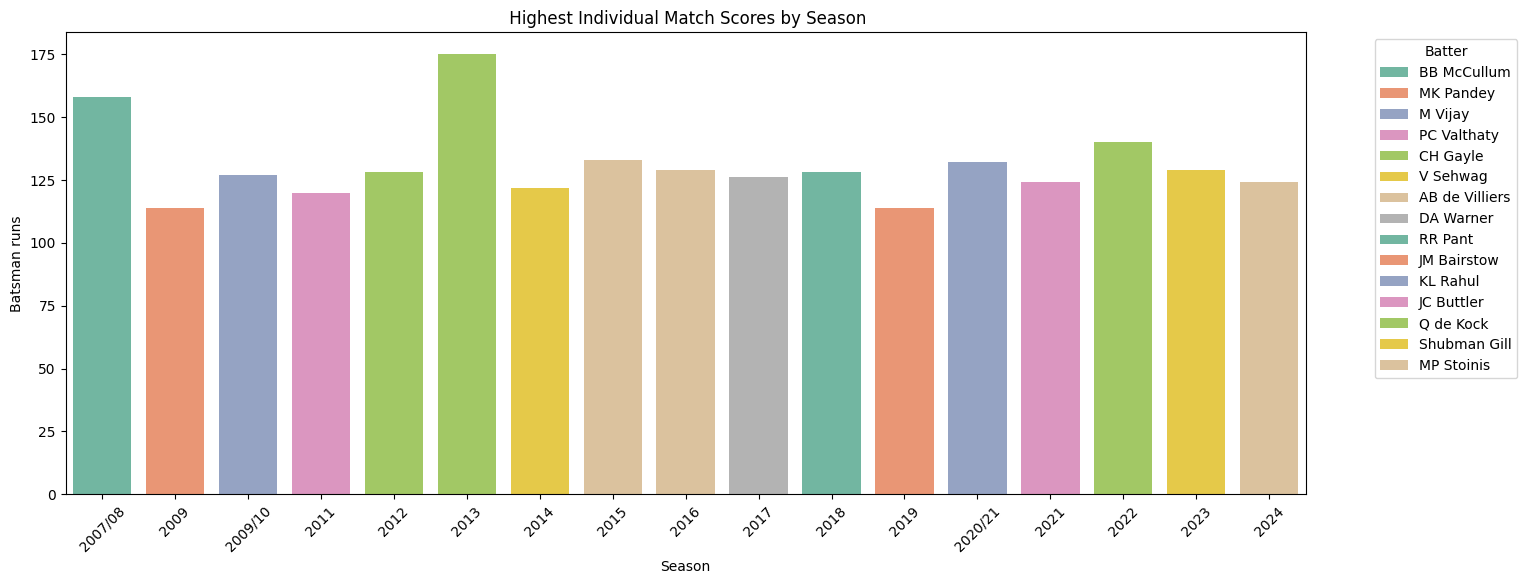

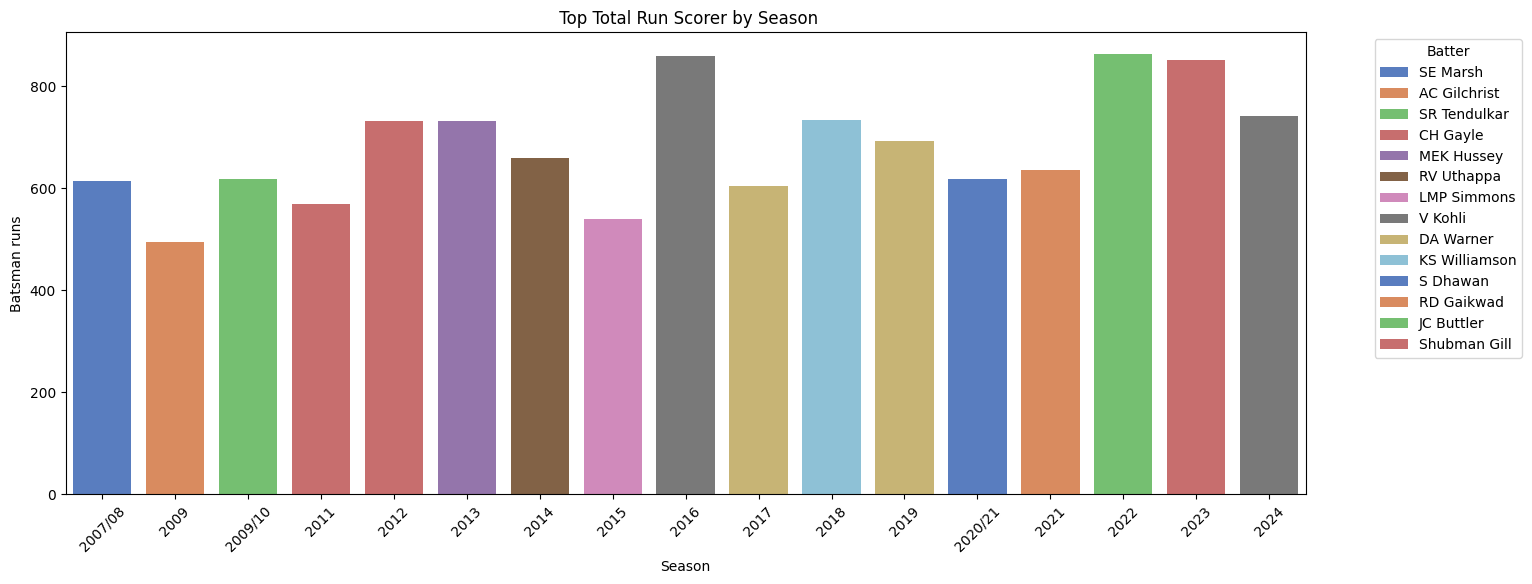

###  Highest Individual Scores by Season

,season,batter,batsman_runs
2,2007/08,BB McCullum,158
1635,2009,MK Pandey,114
2153,2009/10,M Vijay,127
2704,2011,PC Valthaty,120
4565,2012,CH Gayle,128
5146,2013,CH Gayle,175
6669,2014,V Sehwag,122
7307,2015,AB de Villiers,133
8107,2016,AB de Villiers,129
8833,2017,DA Warner,126


###  Top Total Run Scorers by Season

,season,batter,batsman_runs
115,2007/08,SE Marsh,614
166,2009,AC Gilchrist,495
443,2009/10,SR Tendulkar,618
499,2011,CH Gayle,570
681,2012,CH Gayle,733
906,2013,MEK Hussey,733
1083,2014,RV Uthappa,660
1178,2015,LMP Simmons,540
1378,2016,V Kohli,860
1416,2017,DA Warner,604


In [54]:
def get_highest_individual_scores(deliveries, matches):
    match_scores = deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
    match_scores_with_season = match_scores.merge(matches[['match_id', 'season']], on='match_id')
    highest_scores_by_season = match_scores_with_season.loc[
        match_scores_with_season.groupby('season')['batsman_runs'].idxmax()
    ][['season', 'batter', 'batsman_runs']].sort_values(by='season')
    return highest_scores_by_season

def get_top_run_scorers(deliveries, matches):
    seasonal_runs = deliveries.merge(matches[['match_id', 'season']], on='match_id')
    total_runs_by_batter_season = seasonal_runs.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
    top_scorers = total_runs_by_batter_season.loc[
        total_runs_by_batter_season.groupby('season')['batsman_runs'].idxmax()
    ][['season', 'batter', 'batsman_runs']].sort_values(by='season')
    return top_scorers

def plot_barplot(data, x, y, hue, title, palette):
    plt.figure(figsize=(16, 6))
    sns.barplot(x=x, y=y, hue=hue, data=data, dodge=False, palette=palette)
    plt.title(title)
    plt.xlabel(x.capitalize())
    plt.ylabel(y.replace('_', ' ').capitalize())
    plt.xticks(rotation=45)
    plt.legend(title=hue.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


highest_scores = get_highest_individual_scores(deliveries, matches)
top_scorers = get_top_run_scorers(deliveries, matches)

plot_barplot(highest_scores, 'season', 'batsman_runs', 'batter', ' Highest Individual Match Scores by Season', 'Set2')
plot_barplot(top_scorers, 'season', 'batsman_runs', 'batter', ' Top Total Run Scorer by Season', 'muted')

# Displaying summary tables:
from IPython.display import display, Markdown

display(Markdown("###  Highest Individual Scores by Season"))
display(highest_scores)

display(Markdown("###  Top Total Run Scorers by Season"))
display(top_scorers)


## Total Runs Scored by Each Batter

In this section, we analyze the overall run-scoring performance of batters across all IPL seasons.  
We will:  
1. Display a horizontal annotated bar plot of the top 20 run-scorers.  
2. Additionally, show a cumulative distribution to understand how run contributions decline after the top performers.  

This helps us identify consistent top scorers and observe the power-law effect common in player performance distributions.


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\2098931742.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='batsman_runs', y='batter', data=top_20_batters, palette='crest')
C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


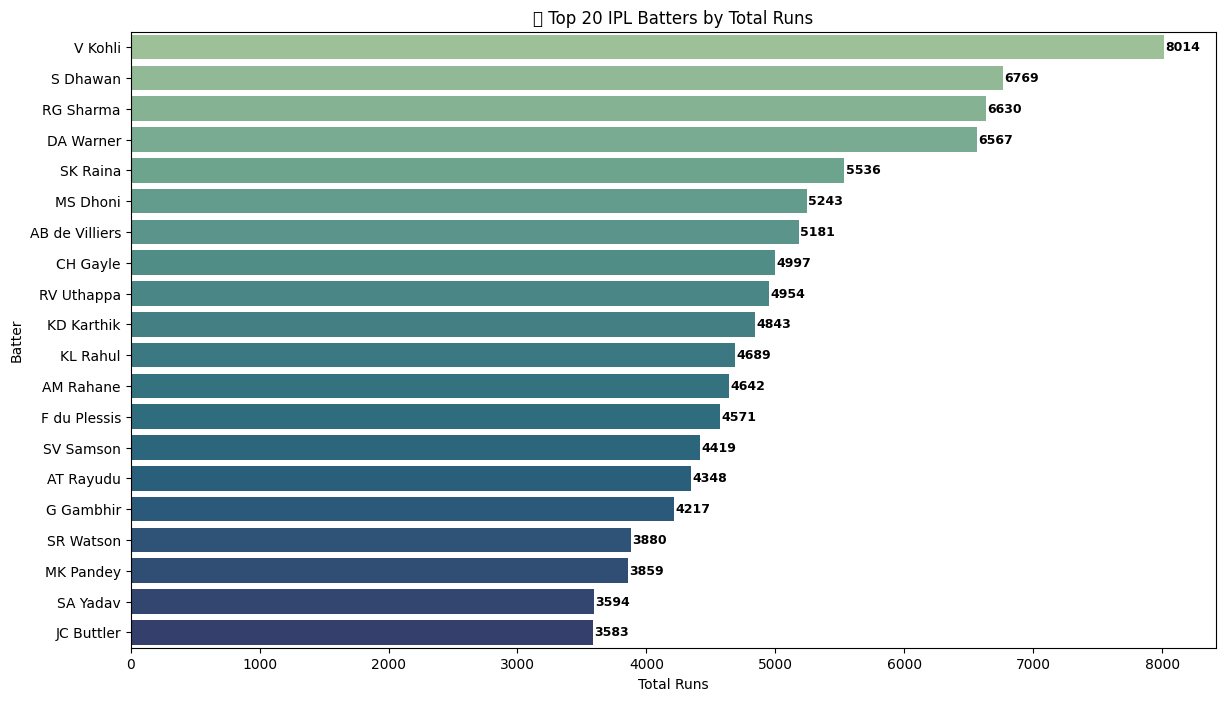

C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


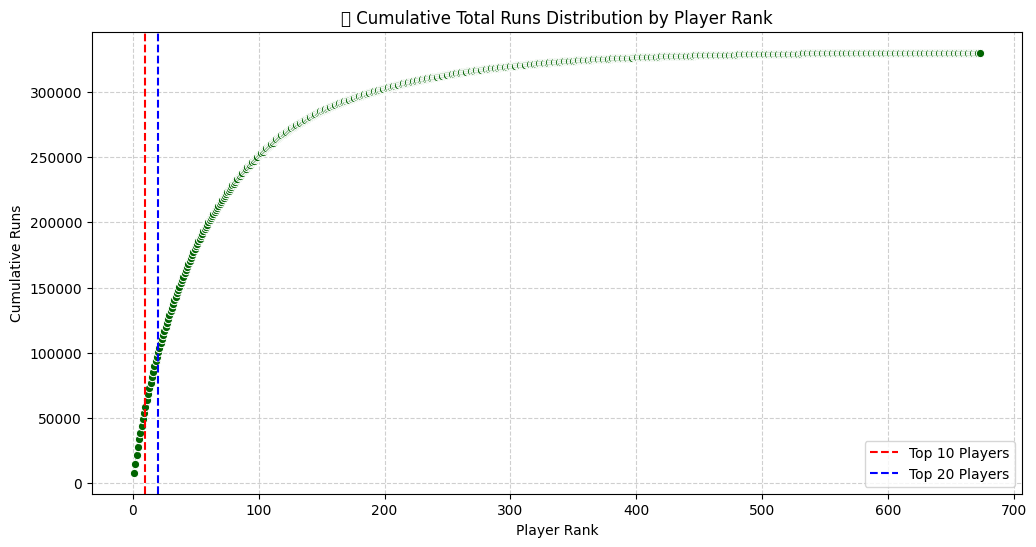

In [56]:
# Grouping by batter to sum total runs
total_runs = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs = total_runs.sort_values(by='batsman_runs', ascending=False)

# Plot 1: Annotated horizontal bar plot (Top 20 batters)
plt.figure(figsize=(14, 8))
top_20_batters = total_runs.head(20)
barplot = sns.barplot(x='batsman_runs', y='batter', data=top_20_batters, palette='crest')
plt.title('🏏 Top 20 IPL Batters by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
for index, value in enumerate(top_20_batters['batsman_runs']):
    plt.text(value + 10, index, str(value), va='center', fontsize=9, weight='bold')
plt.show()

# Plot 2: Cumulative run distribution
total_runs['cumulative_runs'] = total_runs['batsman_runs'].cumsum()
total_runs['player_rank'] = range(1, len(total_runs) + 1)

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_runs, x='player_rank', y='cumulative_runs', marker='o', color='darkgreen')
plt.title('📈 Cumulative Total Runs Distribution by Player Rank')
plt.xlabel('Player Rank')
plt.ylabel('Cumulative Runs')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=10, color='red', linestyle='--', label='Top 10 Players')
plt.axvline(x=20, color='blue', linestyle='--', label='Top 20 Players')
plt.legend(loc='lower right')
plt.show()



### Insights:
- The top 20 batters dominate IPL run charts with standout performances.  
- The cumulative plot reveals that a small group of players contribute heavily to total runs, with contributions tapering off quickly — highlighting the concentration of performance among elite players.

## Number of Balls Faced by Each Batter

We are now analyzing the total number of balls faced by each batter to understand player consistency and opportunities.
We will visualize both the top 10 batters by balls faced and the cumulative contribution using an upward curve."

Visuals:
Bar plot (top 10 batters by balls faced with player names)

Cumulative line plot for balls faced by player rank (similar structure)

### Steps:
- Group the data by `batter` and count the number of balls faced.
- Sort the players by the highest number of balls faced.
- Visualize the **top 10 players** who have spent the most time on the crease.


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\764375712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Balls Faced', y='Batter', data=top_10_balls_faced, palette='Purples_r')


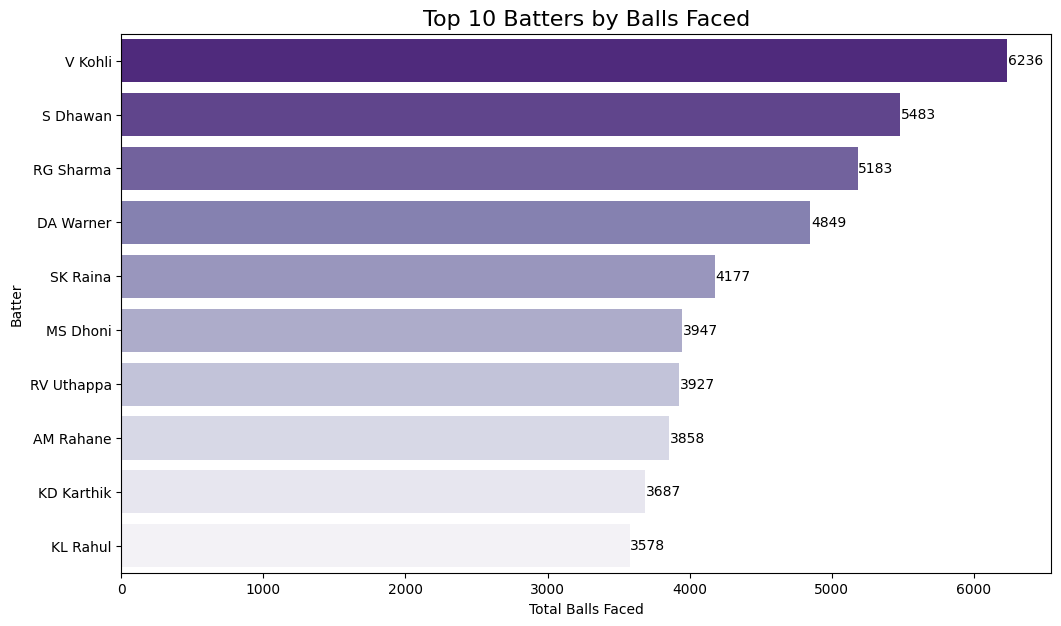

C:\Users\shrut\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


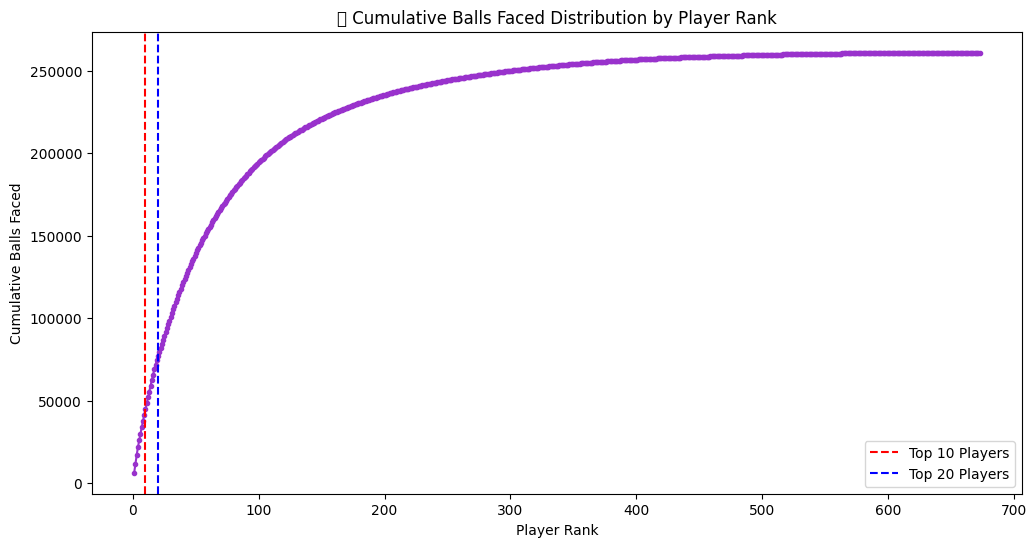

,Batter,Balls Faced,cumulative_balls
0,V Kohli,6236,6236
1,S Dhawan,5483,11719
2,RG Sharma,5183,16902
3,DA Warner,4849,21751
4,SK Raina,4177,25928
5,MS Dhoni,3947,29875
6,RV Uthappa,3927,33802
7,AM Rahane,3858,37660
8,KD Karthik,3687,41347
9,KL Rahul,3578,44925


In [57]:

balls_faced = deliveries.groupby('batter')['ball'].count().reset_index()
balls_faced.columns = ['Batter', 'Balls Faced']
balls_faced = balls_faced.sort_values(by='Balls Faced', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 7))
top_10_balls_faced = balls_faced.head(10)
sns.barplot(x='Balls Faced', y='Batter', data=top_10_balls_faced, palette='Purples_r')
plt.title('Top 10 Batters by Balls Faced', fontsize=16)
plt.xlabel('Total Balls Faced')
plt.ylabel('Batter')
for index, row in top_10_balls_faced.iterrows():
    plt.text(row['Balls Faced'] + 5, index, row['Balls Faced'], color='black', va="center")
plt.show()

balls_faced['cumulative_balls'] = balls_faced['Balls Faced'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(balls_faced) + 1), balls_faced['cumulative_balls'], marker='o', markersize=3, color='darkorchid')
plt.title("📈 Cumulative Balls Faced Distribution by Player Rank")
plt.xlabel("Player Rank")
plt.ylabel("Cumulative Balls Faced")
plt.axvline(x=10, color='red', linestyle='--', label='Top 10 Players')
plt.axvline(x=20, color='blue', linestyle='--', label='Top 20 Players')
plt.legend(loc='lower right')
plt.show()

balls_faced.head(10)


###  Insights:
- Players like **Virat Kohli**, **Shikhar Dhawan**, and **Rohit Sharma** dominate both in runs and balls faced — reflecting consistency and patience.
- Players who face more balls generally also rank high in run-scoring, but this visualization shows who’s spent the most time building innings.




##  Analysis of Boundaries: Fours and Sixes Across Seasons

In this section, we’ll:
- Calculate the total number of 4s and 6s in each season.
- Identify which batter hit the most 4s and 6s each year.
- Visualize the overall trend and player dominance across different seasons.

---


We will define small utility functions for:
- Calculating boundary counts.
- Finding top players by boundary type each season.
- Plotting the trends.


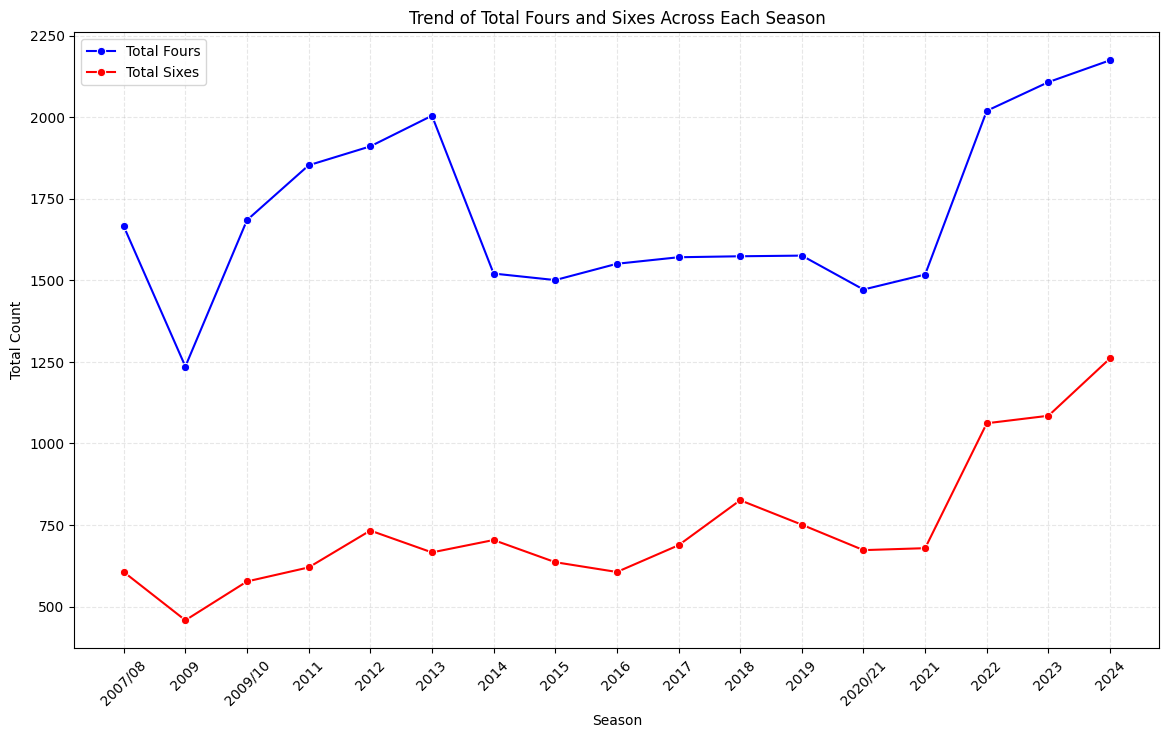

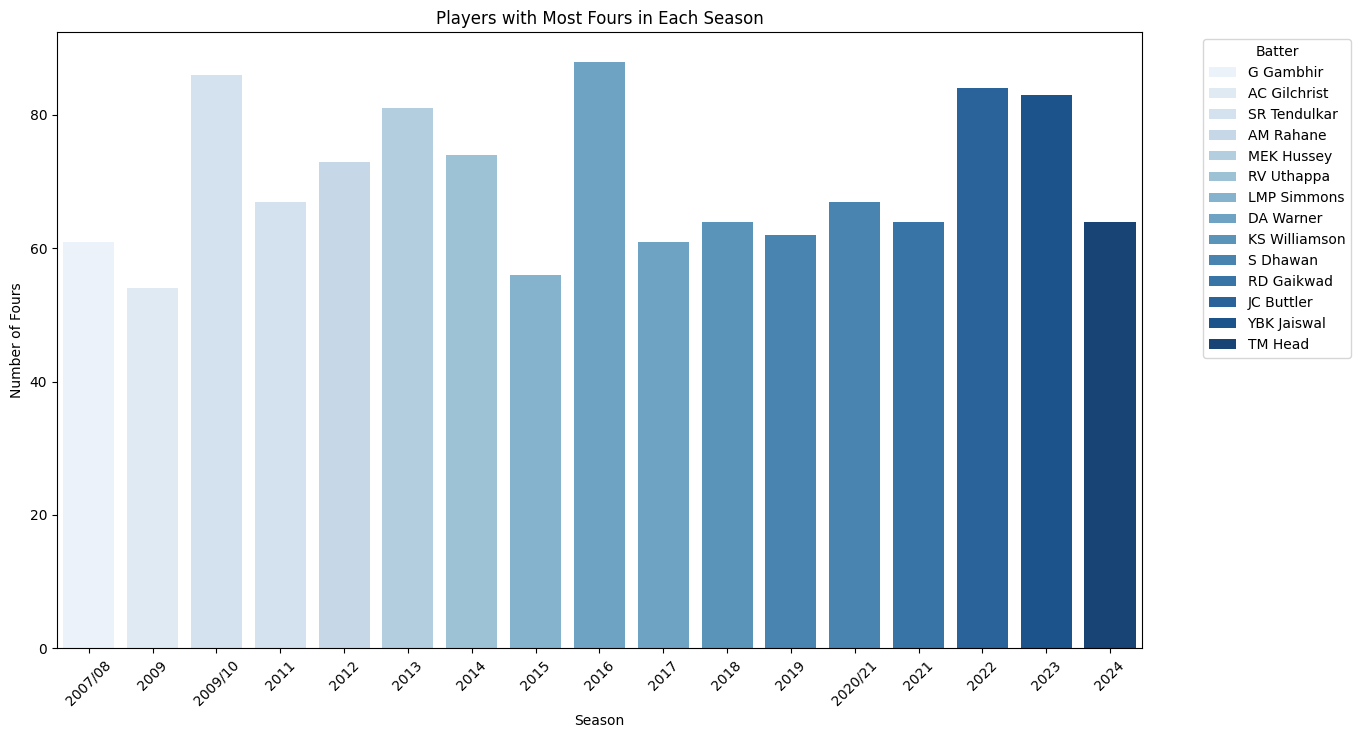

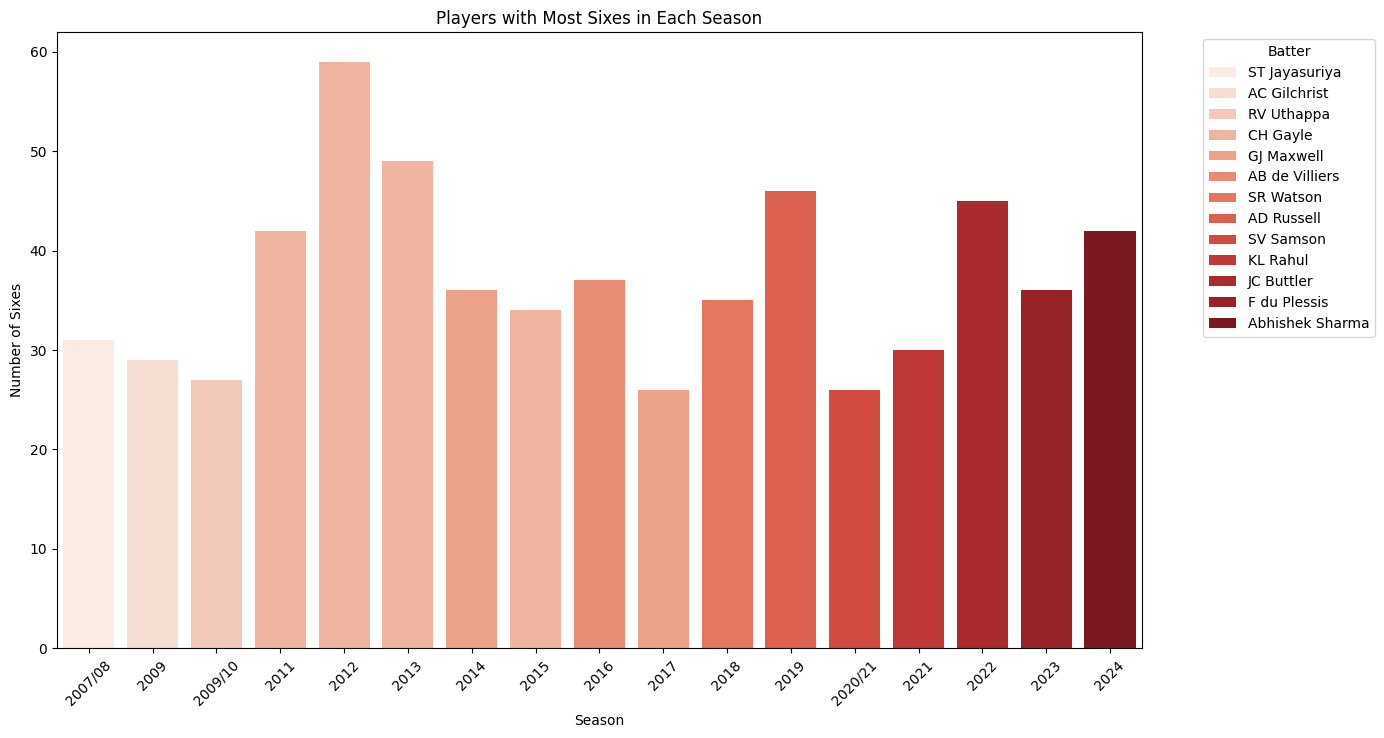

In [49]:
def calculate_boundary_counts(deliveries_with_season, run_type):
    
    return deliveries_with_season[deliveries_with_season['batsman_runs'] == run_type] \
        .groupby('season').size().reset_index(name=f'total_{run_type}s')

def top_boundary_players_by_season(deliveries_with_season, run_type, boundary_name):

    boundaries_by_player = deliveries_with_season[deliveries_with_season['batsman_runs'] == run_type] \
        .groupby(['season', 'batter']).size().reset_index(name=boundary_name)
    return boundaries_by_player.loc[boundaries_by_player.groupby('season')[boundary_name].idxmax()]
def plot_trend_line(total_fours_per_season, total_sixes_per_season):
    """
    Visualize the trend of total 4s and 6s per season.
    """
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='season', y='total_fours', data=total_fours_per_season, marker='o', label='Total Fours', color='blue')
    sns.lineplot(x='season', y='total_sixes', data=total_sixes_per_season, marker='o', label='Total Sixes', color='red')
    plt.title('Trend of Total Fours and Sixes Across Each Season')
    plt.xlabel('Season')
    plt.ylabel('Total Count')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


def plot_top_players_by_boundary(top_players_df, boundary_type, palette_color):
   
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y=boundary_type, hue='batter', data=top_players_df, dodge=False, palette=palette_color)
    plt.title(f'Players with Most {boundary_type.capitalize()} in Each Season')
    plt.xlabel('Season')
    plt.ylabel(f'Number of {boundary_type.capitalize()}')
    plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

# Execution
deliveries_with_season = pd.merge(deliveries, matches[['match_id', 'season']], on='match_id')
# Total number of 4s in each season
total_fours_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 4].groupby('season').size().reset_index(name='total_fours')

# Total number of 6s in each season
total_sixes_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 6].groupby('season').size().reset_index(name='total_sixes')


top_fours_player_per_season = top_boundary_players_by_season(deliveries_with_season, 4, 'fours')
top_sixes_player_per_season = top_boundary_players_by_season(deliveries_with_season, 6, 'sixes')

# Plotting the trends and top players
plot_trend_line(total_fours_per_season, total_sixes_per_season)
plot_top_players_by_boundary(top_fours_player_per_season, 'fours', palette_color='Blues')
plot_top_players_by_boundary(top_sixes_player_per_season, 'sixes', palette_color='Reds')


###  Key Insights:
- The number of boundaries fluctuates across seasons depending on conditions and team strengths.
- Players like **Chris Gayle**, **AB de Villiers**, and **David Warner** frequently top the sixes and fours charts.
- Visualization helps us quickly identify attacking players and changing batting trends seasonally.

---

Next up, we can analyze **bowlers**  


## **Bowlers Analysis** 

**Highest Wicket taker in Overall IPL , Season , Best figures**

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\2434845814.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wickets', y='Bowler', data=wicket_counts.head(top_n), palette='mako')


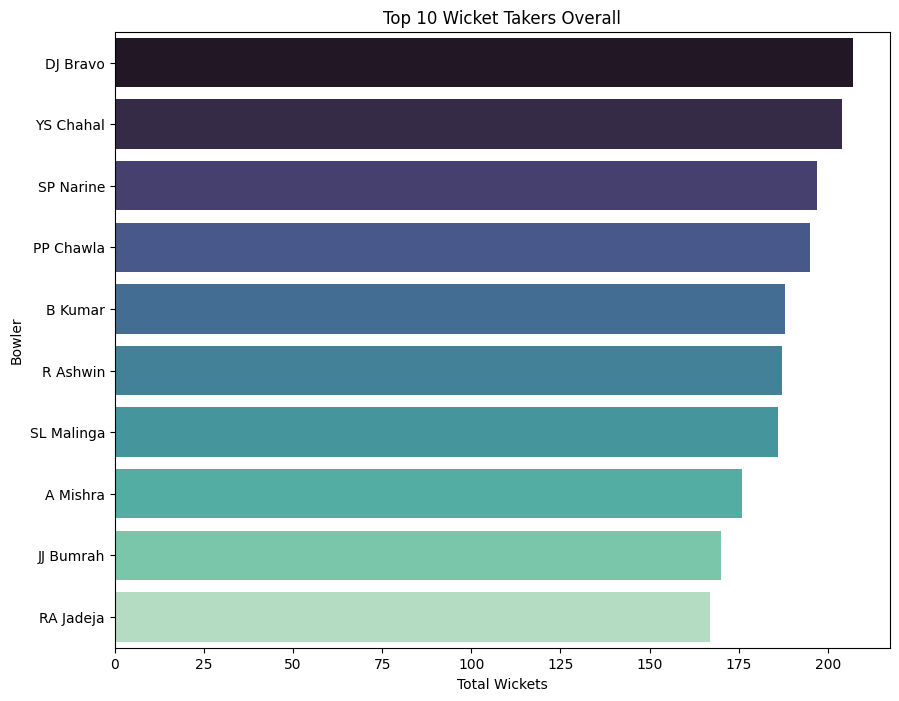


Highest Wicket Taker Overall: DJ Bravo with 207 wickets


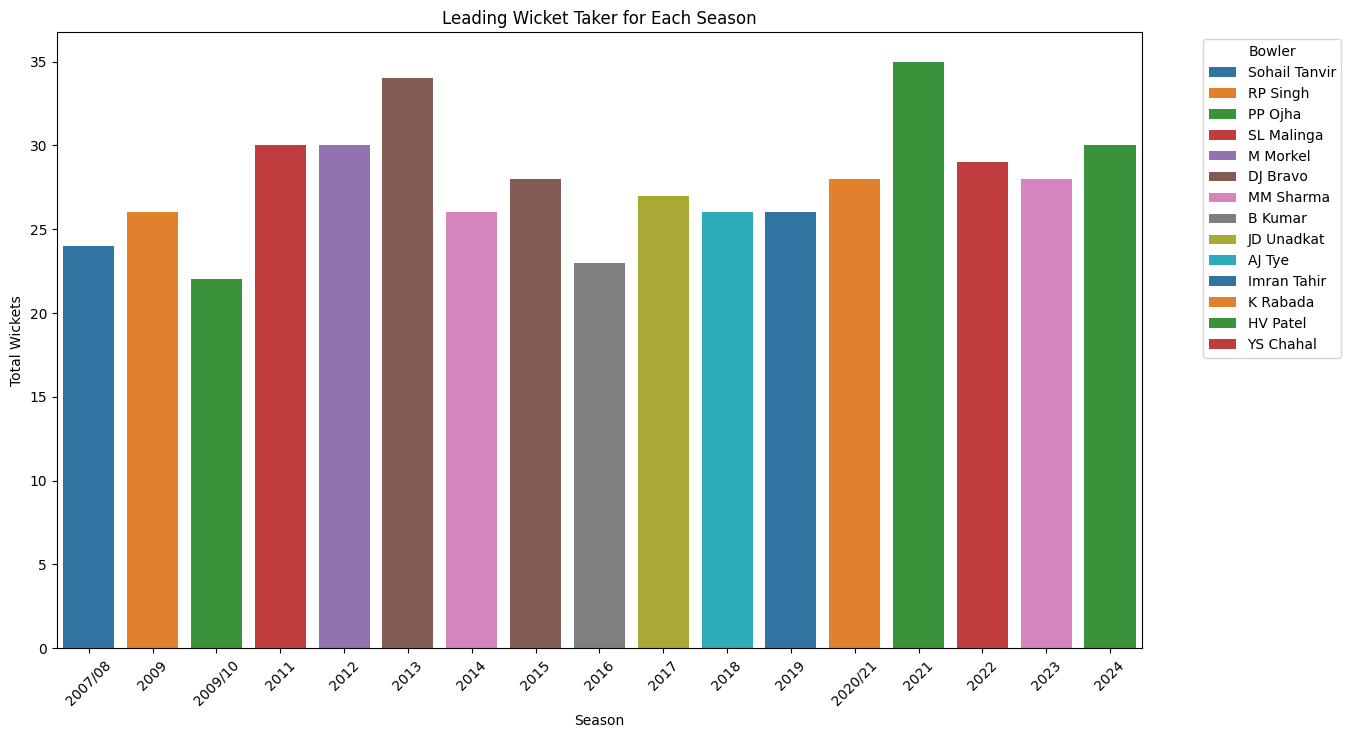

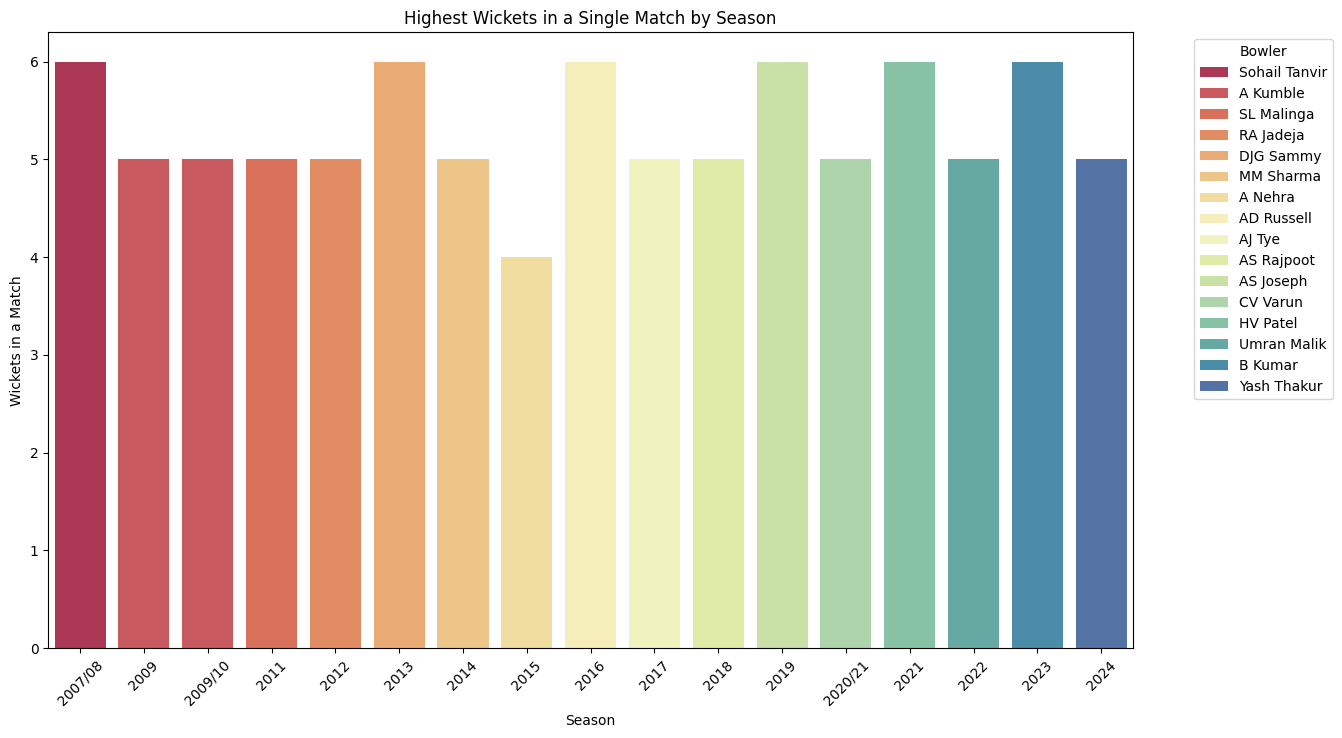


Leading Wicket Taker for Each Season:
       season         bowler  wickets
77    2007/08  Sohail Tanvir       24
156      2009       RP Singh       26
245   2009/10        PP Ojha       22
371      2011     SL Malinga       30
442      2012       M Morkel       30
513      2013       DJ Bravo       34
643      2014      MM Sharma       26
701      2015       DJ Bravo       28
781      2016        B Kumar       23
891      2017     JD Unadkat       27
950      2018         AJ Tye       26
1056     2019    Imran Tahir       26
1148  2020/21       K Rabada       28
1218     2021       HV Patel       35
1387     2022      YS Chahal       29
1454     2023      MM Sharma       28
1525     2024       HV Patel       30

Highest Wickets in a Match for Each Season:
       season         bowler  wickets  match_id
174   2007/08  Sohail Tanvir        6    336005
404      2009       A Kumble        5    392182
853   2009/10       A Kumble        5    419115
1245     2011     SL Malinga        5   

In [50]:
def calculate_leading_wicket_takers(deliveries_season):
    wickets = deliveries_season[deliveries_season['is_wicket'] == 1]
    wickets_per_season = wickets.groupby(['season', 'bowler']).size().reset_index(name='wickets')
    leading_wicket_taker_per_season = wickets_per_season.loc[wickets_per_season.groupby('season')['wickets'].idxmax()]
    return leading_wicket_taker_per_season, wickets


def calculate_highest_wickets_in_match_per_season(wickets):
    wickets_per_match = wickets.groupby(['season', 'match_id', 'bowler']).size().reset_index(name='wickets')
    highest_wickets_per_match_season = wickets_per_match.loc[wickets_per_match.groupby('season')['wickets'].idxmax()]
    return highest_wickets_per_match_season


def plot_top_wicket_takers(wickets, top_n=10):
    wicket_counts = wickets['bowler'].value_counts().reset_index()
    wicket_counts.columns = ['Bowler', 'Wickets']
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Wickets', y='Bowler', data=wicket_counts.head(top_n), palette='mako')
    plt.title(f'Top {top_n} Wicket Takers Overall')
    plt.xlabel('Total Wickets')
    plt.ylabel('Bowler')
    plt.show()
    return wicket_counts.iloc[0]

def plot_leading_wicket_takers_by_season(leading_wickets_df):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='wickets', hue='bowler', data=leading_wickets_df, dodge=False, palette='tab10')
    plt.title('Leading Wicket Taker for Each Season')
    plt.xlabel('Season')
    plt.ylabel('Total Wickets')
    plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()


def plot_highest_wickets_in_match(highest_wickets_match_df):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='season', y='wickets', hue='bowler', data=highest_wickets_match_df, dodge=False, palette='Spectral')
    plt.title('Highest Wickets in a Single Match by Season')
    plt.xlabel('Season')
    plt.ylabel('Wickets in a Match')
    plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()


leading_wicket_taker_per_season, wickets_data = calculate_leading_wicket_takers(deliveries_with_season)
highest_wickets_per_match_season = calculate_highest_wickets_in_match_per_season(wickets_data)
highest_wicket_taker = plot_top_wicket_takers(wickets_data, top_n=10)

print(f"\nHighest Wicket Taker Overall: {highest_wicket_taker['Bowler']} with {highest_wicket_taker['Wickets']} wickets")

plot_leading_wicket_takers_by_season(leading_wicket_taker_per_season)
plot_highest_wickets_in_match(highest_wickets_per_match_season)


print("\nLeading Wicket Taker for Each Season:")
print(leading_wicket_taker_per_season[['season', 'bowler', 'wickets']])

print("\nHighest Wickets in a Match for Each Season:")
print(highest_wickets_per_match_season[['season', 'bowler', 'wickets', 'match_id']])


**Number of Balls Bowled**

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3231657324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Balls Bowled', y='Bowler', data=balls_bowled_df.head(top_n), palette='plasma')


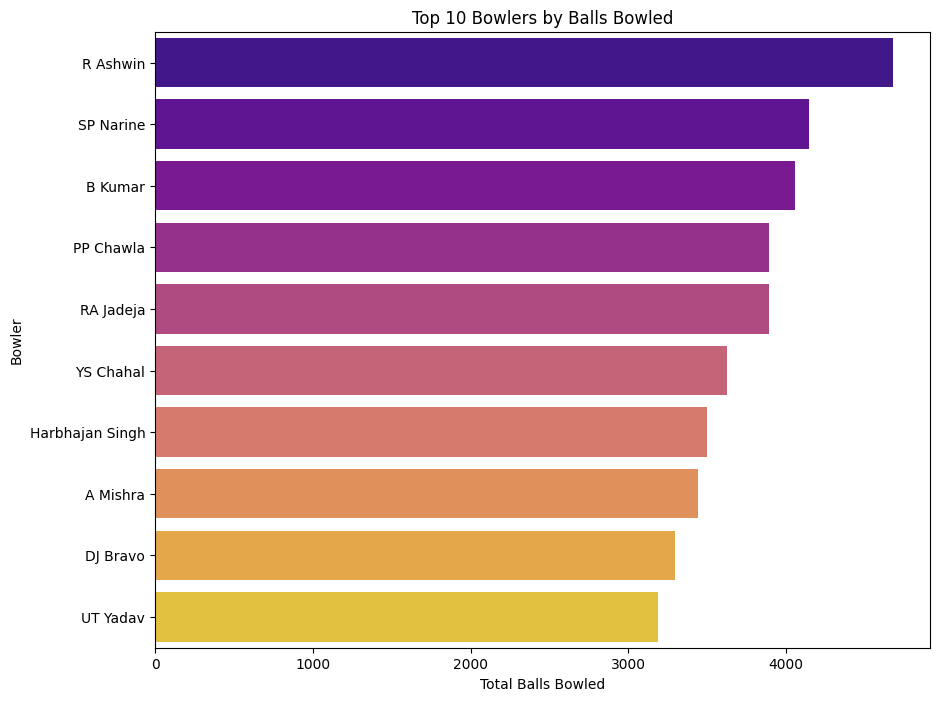

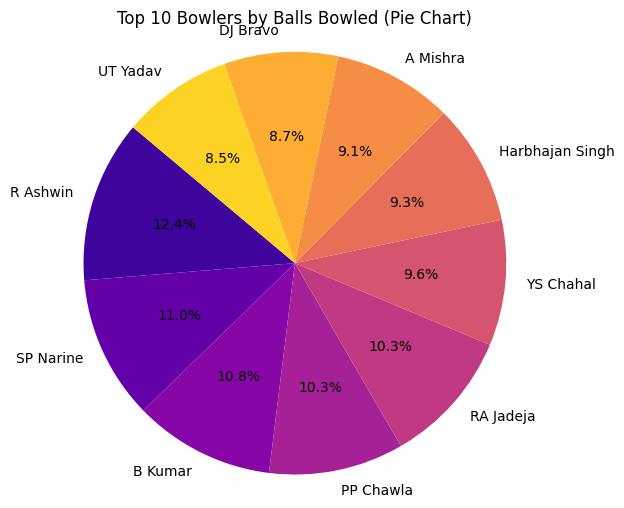

,Bowler,Balls Bowled
355,R Ashwin,4679
446,SP Narine,4146
71,B Kumar,4060
348,PP Chawla,3895
373,RA Jadeja,3895
524,YS Chahal,3628
163,Harbhajan Singh,3496
8,A Mishra,3444
119,DJ Bravo,3296
494,UT Yadav,3190


In [51]:

def calculate_balls_bowled(deliveries):
    balls_bowled = deliveries.groupby('bowler')['ball'].count().reset_index()
    balls_bowled.columns = ['Bowler', 'Balls Bowled']
    balls_bowled = balls_bowled.sort_values(by='Balls Bowled', ascending=False)
    return balls_bowled

def plot_top_bowlers_balls_bowled(balls_bowled_df, top_n=10):
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Balls Bowled', y='Bowler', data=balls_bowled_df.head(top_n), palette='plasma')
    plt.title(f'Top {top_n} Bowlers by Balls Bowled')
    plt.xlabel('Total Balls Bowled')
    plt.ylabel('Bowler')
    plt.show()

def plot_pie_chart_balls_bowled(balls_bowled_df, top_n=10):
    top_bowlers = balls_bowled_df.head(top_n)
    plt.figure(figsize=(6, 6))
    plt.pie(
        top_bowlers['Balls Bowled'], 
        labels=top_bowlers['Bowler'], 
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette('plasma', top_n)
    )
    plt.title(f'Top {top_n} Bowlers by Balls Bowled (Pie Chart)')
    plt.axis('equal')
    plt.show()


balls_bowled_df = calculate_balls_bowled(deliveries)
plot_top_bowlers_balls_bowled(balls_bowled_df, top_n=10)
plot_pie_chart_balls_bowled(balls_bowled_df, top_n=10)

balls_bowled_df.head(20)


🎯 Most Economical Bowlers Across Seasons
In this analysis, we identify bowlers who consistently maintained the best economy rates (lowest runs per over) across all IPL seasons.

Key steps involved:

Calculated total runs conceded and total balls bowled for each bowler by season.

Computed economy rate = (Total runs conceded) / (Overs bowled).

Filtered bowlers with a minimum of 100 balled bowled  to ensure reliability.


Also displayed an overall annotated bar plot for the top 10 most economical bowlers.

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3458801295.py:23: UserWarning: The palette list has more values (17) than needed (15), which may not be intended.
  bar = sns.barplot(x='season', y='economy', hue='bowler', data=best_economy_per_season, dodge=False, palette=ipl_palette)


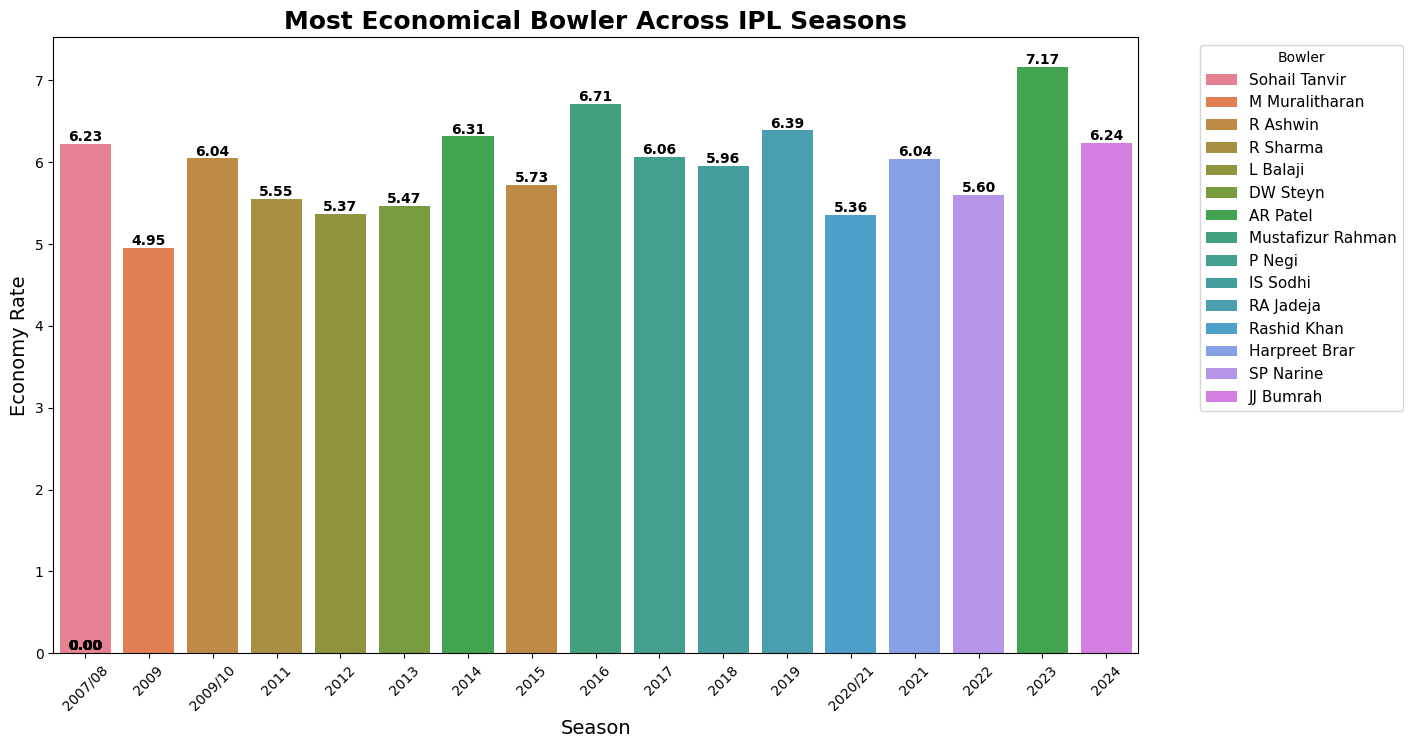

Most Economical Bowlers Per Season:
       season             bowler   economy
84    2007/08      Sohail Tanvir  6.226415
154      2009     M Muralitharan  4.946237
285   2009/10           R Ashwin  6.043956
419      2011           R Sharma  5.554054
530      2012           L Balaji  5.365079
631      2013           DW Steyn  5.465649
726      2014           AR Patel  6.312655
887      2015           R Ashwin  5.725000
980      2016  Mustafizur Rahman  6.712707
1088     2017             P Negi  6.060000
1162     2018           IS Sodhi  5.956522
1296     2019          RA Jadeja  6.386503
1399  2020/21        Rashid Khan  5.355372
1453     2021      Harpreet Brar  6.042553
1634     2022          SP Narine  5.596491
1664     2023           AR Patel  7.166667
1832     2024          JJ Bumrah  6.237805


In [ ]:

bowler_runs = deliveries_with_season.groupby(['season', 'bowler'])['total_runs'].sum().reset_index(name='total_runs')
bowler_balls = deliveries_with_season.groupby(['season', 'bowler']).size().reset_index(name='balls_bowled')

bowler_economy = pd.merge(bowler_runs, bowler_balls, on=['season', 'bowler'])
bowler_economy['economy'] = (bowler_economy['total_runs'] / bowler_economy['balls_bowled']) * 6
bowler_economy_filtered = bowler_economy[bowler_economy['balls_bowled'] > 100]
best_economy_per_season = bowler_economy_filtered.loc[bowler_economy_filtered.groupby('season')['economy'].idxmin()]
best_economy_per_season = best_economy_per_season.sort_values(by='season')

ipl_palette = sns.color_palette("husl", len(best_economy_per_season))

plt.figure(figsize=(14, 8))
bar = sns.barplot(x='season', y='economy', hue='bowler', data=best_economy_per_season, dodge=False, palette=ipl_palette)
plt.title('Most Economical Bowler Across IPL Seasons', fontsize=18, weight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Economy Rate', fontsize=14)
plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.xticks(rotation=45)


for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, weight='bold')

plt.show()

print("Most Economical Bowlers Per Season:")
print(best_economy_per_season[['season', 'bowler', 'economy']])


## Most Extras Conceded by Bowlers

In this section, we analyze bowlers who have conceded the most extras (wides, no-balls, and other extra runs) throughout the IPL seasons.  
Maintaining a low count of extras is crucial for a bowler’s economy and discipline, and this analysis identifies bowlers who need improvement in that aspect.  

The visualization below highlights the top 10 bowlers who have given away the most extras:


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3095876432.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='extra_runs', y='bowler', data=top_extras_bowlers, palette='inferno')


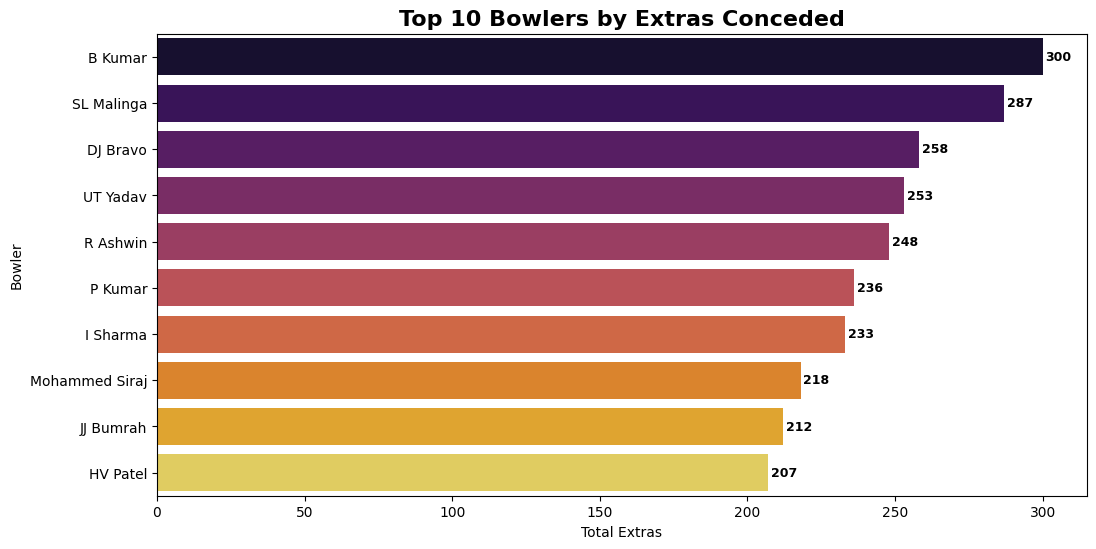

,bowler,extra_runs
71,B Kumar,300
438,SL Malinga,287
119,DJ Bravo,258
493,UT Yadav,253
355,R Ashwin,248
335,P Kumar,236
168,I Sharma,233
304,Mohammed Siraj,218
193,JJ Bumrah,212
162,HV Patel,207


In [68]:
def plot_top_extras_bowlers(deliveries_df, top_n=10):

    extras_by_bowler = (
        deliveries_df.groupby('bowler')['extra_runs']
        .sum()
        .reset_index()
        .sort_values(by='extra_runs', ascending=False)
    )
    
    top_extras_bowlers = extras_by_bowler.head(top_n)


    plt.figure(figsize=(12, 6))
    bar = sns.barplot(x='extra_runs', y='bowler', data=top_extras_bowlers, palette='inferno')
    plt.title(f'Top {top_n} Bowlers by Extras Conceded', fontsize=16, weight='bold')
    plt.xlabel('Total Extras')
    plt.ylabel('Bowler')

 
    for p in bar.patches:
        bar.annotate(int(p.get_width()), (p.get_width() + 1, p.get_y() + p.get_height() / 2),
                     ha='left', va='center', fontsize=9, weight='bold')

    plt.show()

    return top_extras_bowlers


top_extras_bowlers_df = plot_top_extras_bowlers(deliveries_with_season, top_n=10)
top_extras_bowlers_df


##  Types of Dismissals

This section provides a visual overview of the different types of dismissals that occurred throughout the IPL seasons.  
Understanding dismissal patterns can help teams strategize better in bowling and field placements.

Below is a pie chart showing the distribution of each dismissal type:


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\4204697762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Count', y='Dismissal Kind', data=dismissal_types, palette='crest')


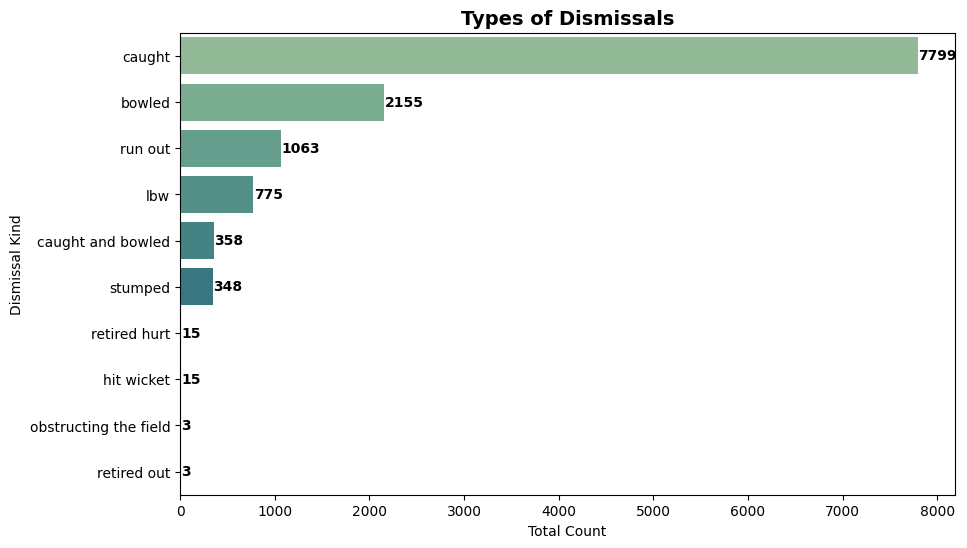

,Dismissal Kind,Count
0,caught,7799
1,bowled,2155
2,run out,1063
3,lbw,775
4,caught and bowled,358
5,stumped,348
6,retired hurt,15
7,hit wicket,15
8,obstructing the field,3
9,retired out,3


In [71]:
def plot_dismissal_types_bar_chart(deliveries_df):
    dismissal_types = deliveries_df['dismissal_kind'].value_counts().reset_index()
    dismissal_types.columns = ['Dismissal Kind', 'Count']
    
    plt.figure(figsize=(10, 6))
    bar = sns.barplot(x='Count', y='Dismissal Kind', data=dismissal_types, palette='crest')
    plt.title('Types of Dismissals', fontsize=14, weight='bold')
    plt.xlabel('Total Count')
    plt.ylabel('Dismissal Kind')
    
    # Add annotations
    for p in bar.patches:
        plt.text(p.get_width() + 5, p.get_y() + p.get_height() / 2,
                 f'{int(p.get_width())}', ha='left', va='center', fontsize=10, weight='bold')

    plt.show()
    return dismissal_types

dismissal_types_df = plot_dismissal_types_bar_chart(deliveries_with_season)
dismissal_types_df


### Dismissal Types Across IPL Seasons
This analysis highlights how different dismissal types (like caught, bowled, run out, LBW, etc.) have varied across each IPL season.

The stacked bar chart below clearly shows how each dismissal type contributed to the total dismissals per year, helping us identify consistency or shifts in player dismissals ove

<Figure size 1400x800 with 0 Axes>

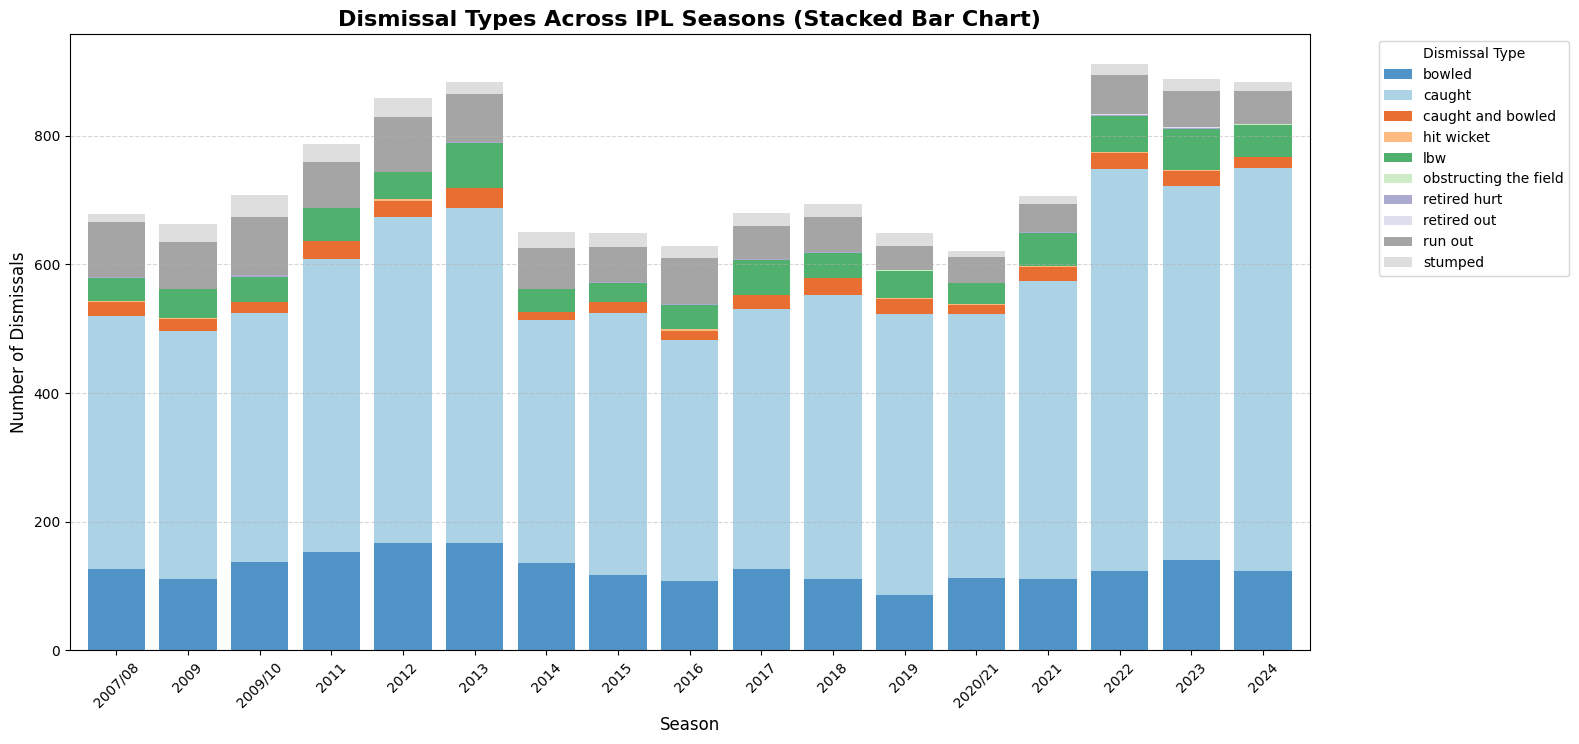

In [72]:

dismissals_per_season = (
    deliveries_with_season.groupby(['season', 'dismissal_kind'])
    .size()
    .reset_index(name='count')
)


dismissals_per_season = dismissals_per_season[dismissals_per_season['dismissal_kind'].notna()]

dismissals_pivot = dismissals_per_season.pivot_table(
    index='season', columns='dismissal_kind', values='count', fill_value=0
)


plt.figure(figsize=(14, 8))
dismissals_pivot.plot(
    kind='bar', stacked=True, colormap='tab20c', figsize=(16, 8), alpha=0.85, width=0.8
)
plt.title('Dismissal Types Across IPL Seasons (Stacked Bar Chart)', fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Dismissals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Dismissal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


 ### Bowler Performance in Powerplay vs. Death Overs
This analysis compares the economy rates and wicket-taking abilities of bowlers in two critical phases of a T20 match:

Powerplay overs (1-6), where bowlers aim to restrict runs with a new ball.

Death overs (16-20), where bowlers are under pressure to contain explosive batting.

The plots below highlight the top bowlers with respect to their economy rates and wickets in both phases. This helps identify which bowlers excel early in the innings versus those who perform under pressure at the end.

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3477309836.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='economy_rate_powerplay', y='bowler',
C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3477309836.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='economy_rate_death', y='bowler',


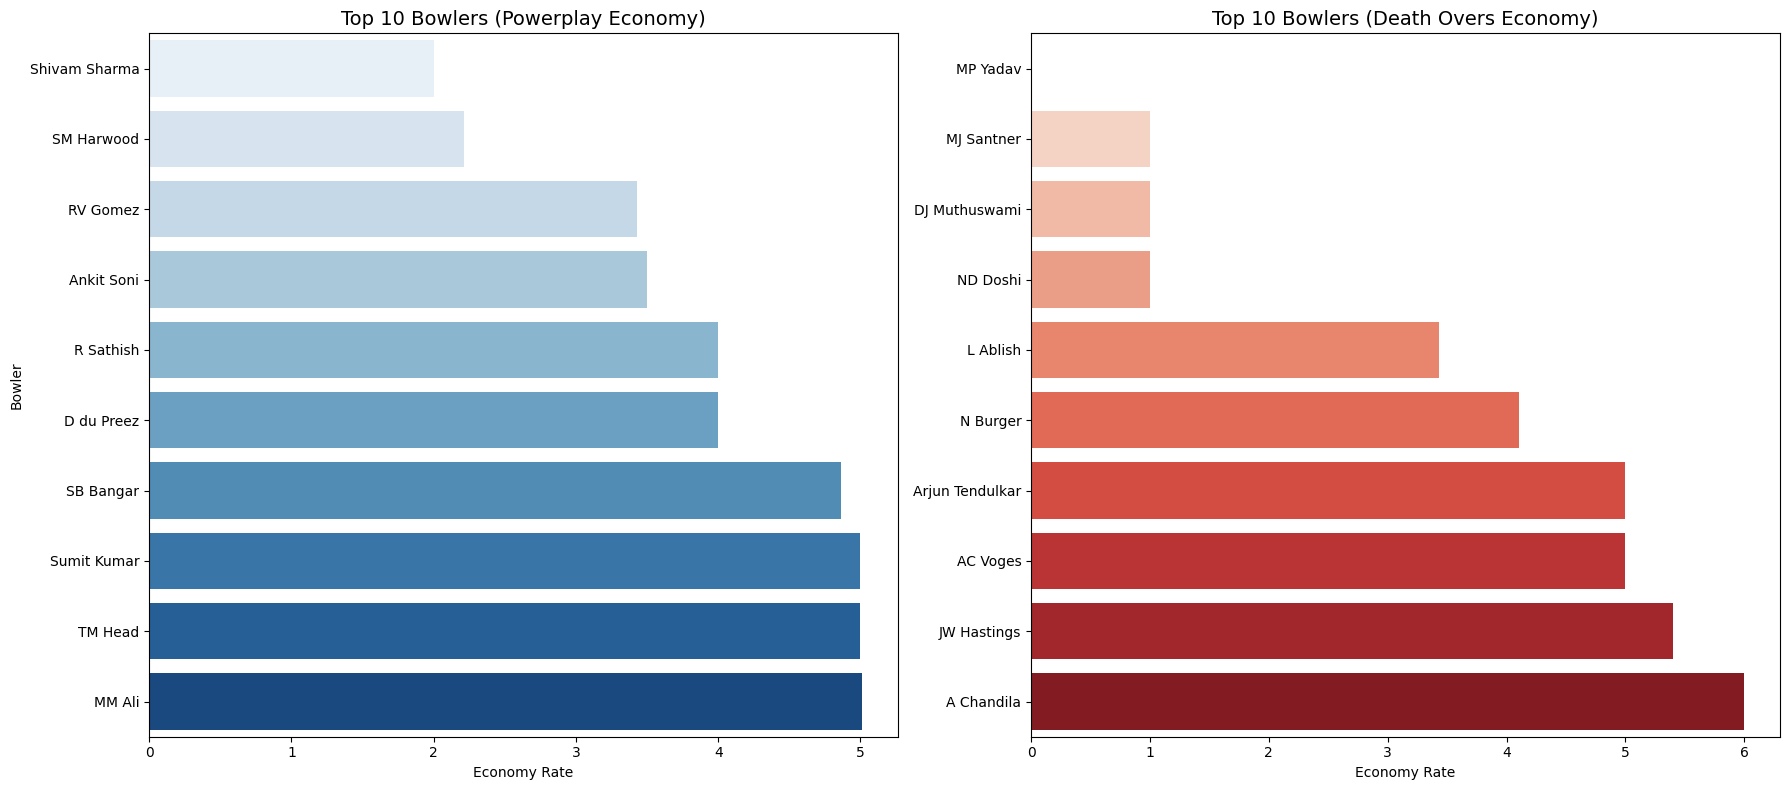

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3477309836.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='wickets_powerplay', y='bowler',
C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\3477309836.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='wickets_death', y='bowler',


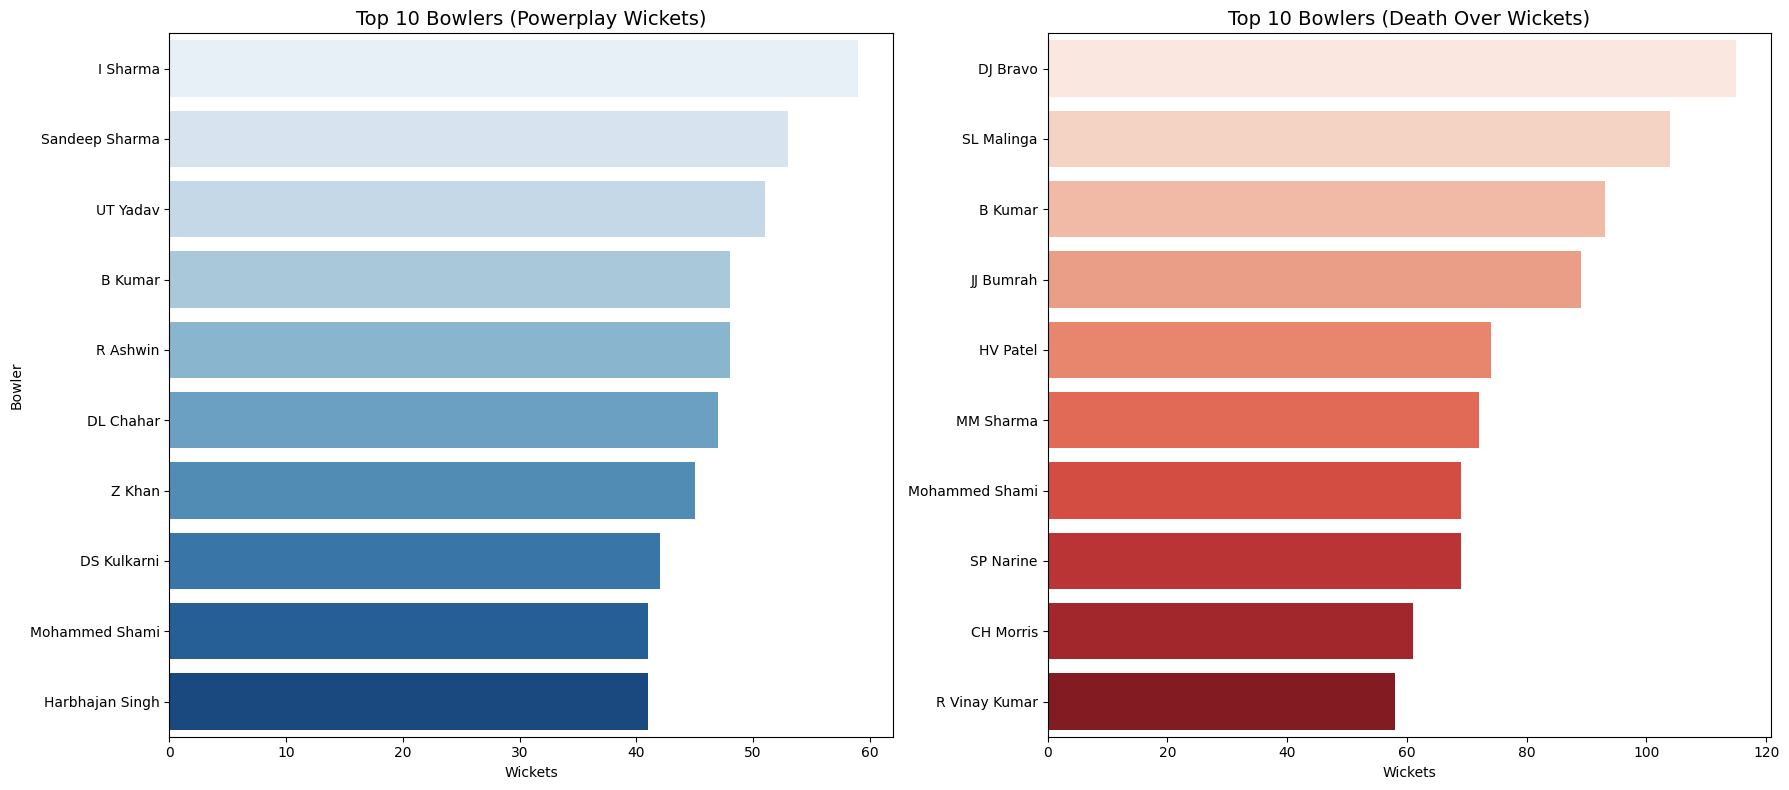

,bowler,economy_rate_powerplay,wickets_powerplay,economy_rate_death,wickets_death
0,A Ashish Reddy,15.000000,0,9.840000,8
1,A Chandila,6.058824,5,6.000000,0
2,A Choudhary,5.032258,2,8.888889,1
3,A Flintoff,7.666667,1,17.333333,1
4,A Kumble,5.558282,3,7.928571,15
5,A Mishra,6.829374,22,9.420000,30
6,A Mithun,8.446602,1,10.941176,5
7,A Nehra,7.457317,39,8.751152,54
8,A Nel,11.500000,1,8.000000,0
9,A Nortje,8.313830,19,9.954545,23


In [73]:

powerplay_deliveries = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]
death_over_deliveries = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)]

powerplay_stats = powerplay_deliveries.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets=('is_wicket', 'sum')
).reset_index()
powerplay_stats['economy_rate'] = powerplay_stats['runs_conceded'] / (powerplay_stats['balls_bowled'] / 6)

death_over_stats = death_over_deliveries.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count'),
    wickets=('is_wicket', 'sum')
).reset_index()
death_over_stats['economy_rate'] = death_over_stats['runs_conceded'] / (death_over_stats['balls_bowled'] / 6)


bowler_comparison = pd.merge(
    powerplay_stats[['bowler', 'economy_rate', 'wickets']],
    death_over_stats[['bowler', 'economy_rate', 'wickets']],
    on='bowler',
    suffixes=('_powerplay', '_death')
)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(ax=axes[0], x='economy_rate_powerplay', y='bowler',
            data=bowler_comparison.sort_values('economy_rate_powerplay').head(10), palette='Blues')
axes[0].set_title('Top 10 Bowlers (Powerplay Economy)', fontsize=14)
axes[0].set_xlabel('Economy Rate')
axes[0].set_ylabel('Bowler')

sns.barplot(ax=axes[1], x='economy_rate_death', y='bowler',
            data=bowler_comparison.sort_values('economy_rate_death').head(10), palette='Reds')
axes[1].set_title('Top 10 Bowlers (Death Overs Economy)', fontsize=14)
axes[1].set_xlabel('Economy Rate')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(ax=axes[0], x='wickets_powerplay', y='bowler',
            data=bowler_comparison.sort_values('wickets_powerplay', ascending=False).head(10), palette='Blues')
axes[0].set_title('Top 10 Bowlers (Powerplay Wickets)', fontsize=14)
axes[0].set_xlabel('Wickets')
axes[0].set_ylabel('Bowler')

sns.barplot(ax=axes[1], x='wickets_death', y='bowler',
            data=bowler_comparison.sort_values('wickets_death', ascending=False).head(10), palette='Reds')
axes[1].set_title('Top 10 Bowlers (Death Over Wickets)', fontsize=14)
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

bowler_comparison.head(10)


## **Team Level Analysis**

### Team with Most Wins

This analysis highlights the top-performing teams in IPL history based on the number of matches won.

The visualization below shows the top 10 teams with the highest number of wins, helping to quickly identify the most successful franchises.



Team with the Most Wins: Mumbai Indians with 142 wins


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\2232054685.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Wins', y='Team', data=team_wins, palette='Blues')


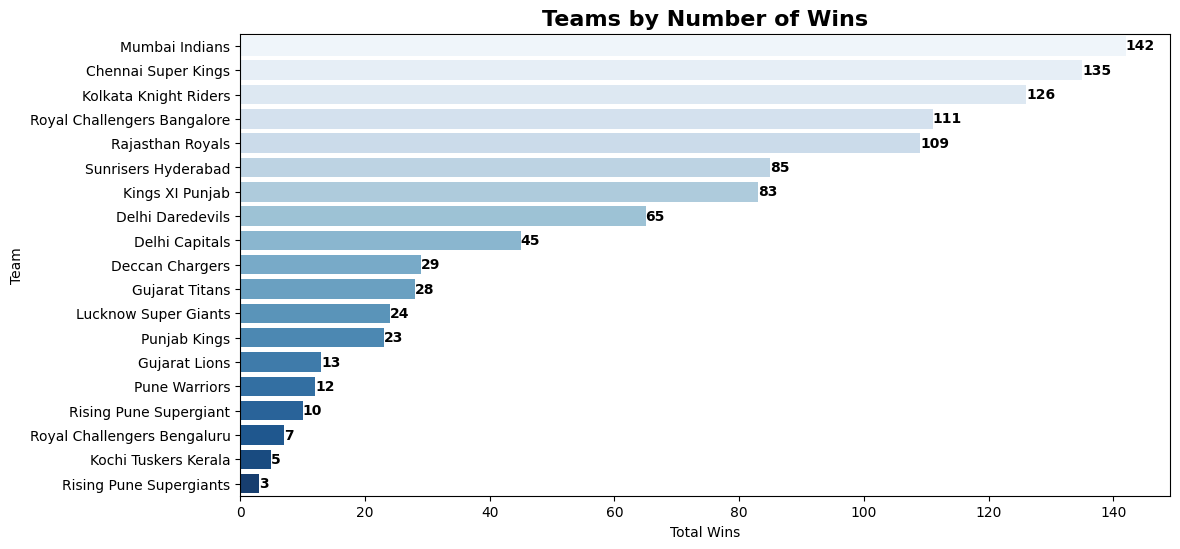

,Team,Wins
0,Mumbai Indians,142
1,Chennai Super Kings,135
2,Kolkata Knight Riders,126
3,Royal Challengers Bangalore,111
4,Rajasthan Royals,109
5,Sunrisers Hyderabad,85
6,Kings XI Punjab,83
7,Delhi Daredevils,65
8,Delhi Capitals,45
9,Deccan Chargers,29


In [77]:
# Counting total wins by each team
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

# Displaying the team with the most wins
print(f"Team with the Most Wins: {team_wins.iloc[0]['Team']} with {team_wins.iloc[0]['Wins']} wins")

plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Wins', y='Team', data=team_wins, palette='Blues')
plt.title('Teams by Number of Wins', fontsize=16, weight='bold')
plt.xlabel('Total Wins')
plt.ylabel('Team')

for p in bar.patches:
    bar.annotate(int(p.get_width()), (p.get_width(), p.get_y() + p.get_height()/2),
                 ha='left', va='center', fontsize=10, weight='bold')

plt.show()


team_wins


**Season-wise Winning Teams**

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\2087488193.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(
C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\2087488193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


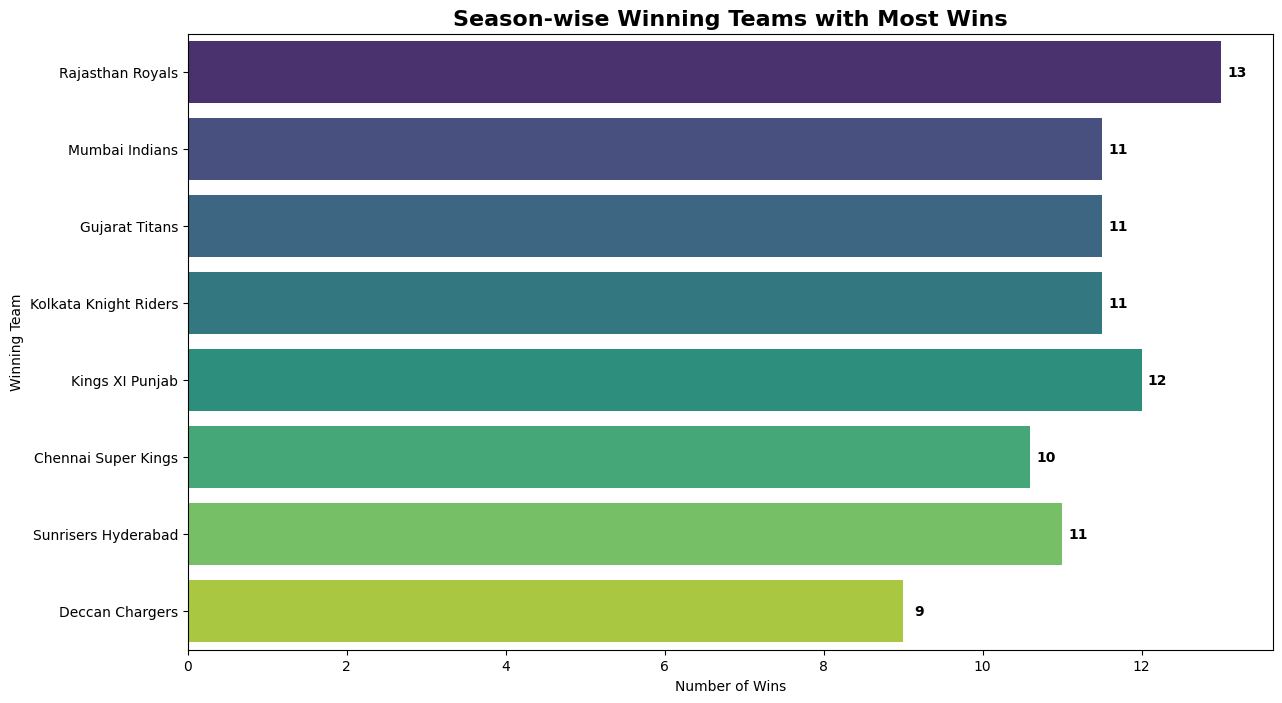

,season,winner,wins
6,2007/08,Rajasthan Royals,13
9,2009,Deccan Chargers,9
21,2009/10,Mumbai Indians,11
24,2011,Chennai Super Kings,11
38,2012,Kolkata Knight Riders,12
47,2013,Mumbai Indians,13
54,2014,Kings XI Punjab,12
60,2015,Chennai Super Kings,10
75,2016,Sunrisers Hyderabad,11
80,2017,Mumbai Indians,11


In [80]:

season_wins = matches.groupby(['season', 'winner']).size().reset_index(name='wins')

season_winners = season_wins.loc[season_wins.groupby('season')['wins'].idxmax()]


plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='wins', 
    y='winner', 
    data=season_winners.sort_values(by='wins', ascending=False),
    palette='viridis',
    ci=None  
)
plt.title('Season-wise Winning Teams with Most Wins', fontsize=16, weight='bold')
plt.xlabel('Number of Wins')
plt.ylabel('Winning Team')

for p in barplot.patches:
    barplot.annotate(int(p.get_width()), (p.get_width() + 0.2, p.get_y() + p.get_height() / 2),
                     ha='center', va='center', fontsize=10, weight='bold')
plt.show()

season_winners




###  Highest and Lowest Team Scores in IPL History

In this section, we analyze each team's highest and lowest total runs scored in a match. 

This helps us understand the peak performances and challenging moments for each team across seasons.

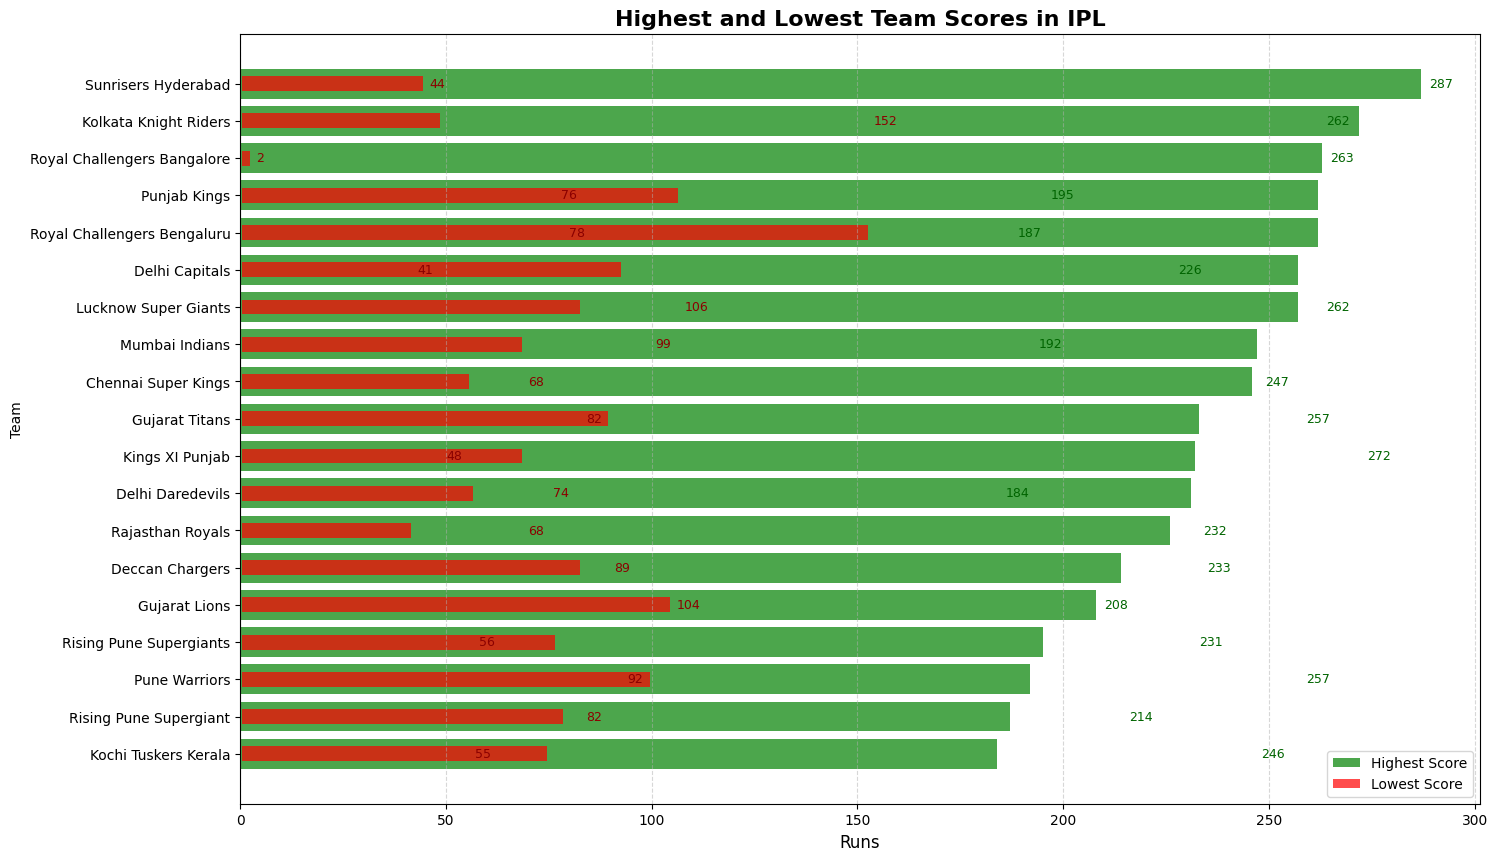

In [110]:

team_scores = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

highest_scores = team_scores.groupby('batting_team')['total_runs'].max().reset_index()
lowest_scores = team_scores.groupby('batting_team')['total_runs'].min().reset_index()

team_high_low_scores = pd.merge(highest_scores, lowest_scores, on='batting_team', suffixes=('_highest', '_lowest'))

team_high_low_sorted = team_high_low_scores.sort_values(by='total_runs_highest', ascending=True)

plt.figure(figsize=(16, 10))

plt.barh(team_high_low_sorted['batting_team'], 
         team_high_low_sorted['total_runs_highest'], 
         color='green', alpha=0.7, label='Highest Score')

plt.barh(team_high_low_sorted['batting_team'], 
         team_high_low_sorted['total_runs_lowest'], 
         color='red', alpha=0.7, label='Lowest Score', height=0.4, left=0.5)

plt.title('Highest and Lowest Team Scores in IPL', fontsize=16, weight='bold')
plt.xlabel('Runs', fontsize=12)
plt.ylabel('Team')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, row in team_high_low_sorted.iterrows():
    plt.text(row['total_runs_highest'] + 2, i, f"{row['total_runs_highest']}", va='center', fontsize=9, color='darkgreen')
    plt.text(row['total_runs_lowest'] + 2, i, f"{row['total_runs_lowest']}", va='center', fontsize=9, color='darkred')

plt.show()



## **Match Outcome Analysis** 

### Toss Impact Analysis

How often does the toss winner also win the match?

Impact of Toss Decision (Bat or Field first) on Match Outcome

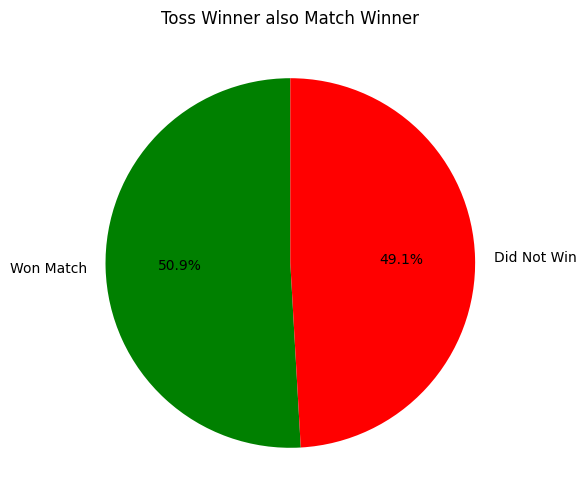

Toss Winner also wins the match: 50.90% of the time


In [82]:

matches['toss_and_match_winner'] = matches['toss_winner'] == matches['winner']
toss_match_win_rate = matches['toss_and_match_winner'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie([toss_match_win_rate, 100 - toss_match_win_rate], labels=['Won Match', 'Did Not Win'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Toss Winner also Match Winner')
plt.show()


print(f"Toss Winner also wins the match: {toss_match_win_rate:.2f}% of the time")


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\703910975.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='toss_decision', y='win_percentage', data=toss_decision_impact, palette='viridis')


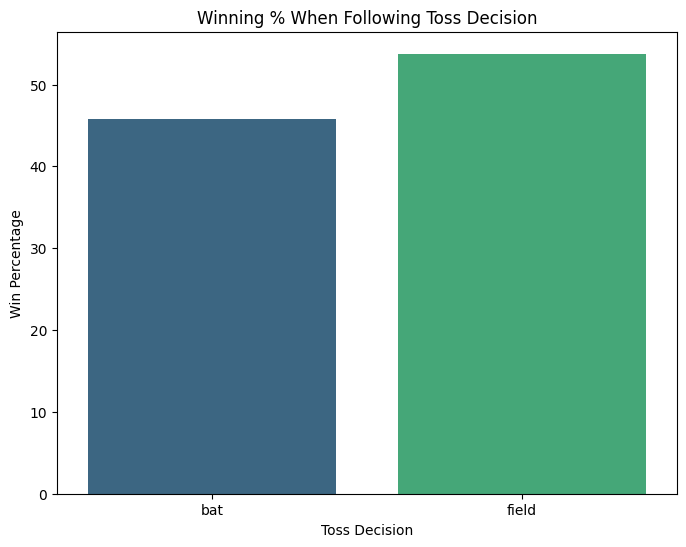

In [85]:

matches['toss_decision_winner'] = matches.apply(
    lambda x: x['toss_winner'] == x['winner'] and x['toss_decision'] == 'bat', axis=1
)

bat_wins = matches[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner'])].shape[0]
bat_total = matches[matches['toss_decision'] == 'bat'].shape[0]
bat_win_percentage = (bat_wins / bat_total) * 100

# Similarly for 'field' toss decisions
field_wins = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])].shape[0]
field_total = matches[matches['toss_decision'] == 'field'].shape[0]
field_win_percentage = (field_wins / field_total) * 100


toss_decision_impact = pd.DataFrame({
    'toss_decision': ['bat', 'field'],
    'win_percentage': [bat_win_percentage, field_win_percentage]
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='toss_decision', y='win_percentage', data=toss_decision_impact, palette='viridis')
plt.title('Winning % When Following Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Win Percentage')
plt.show()


## **Umpire Statistics** 

### **Umpires Standings**

C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\4132180183.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x='Matches', y='Umpire', data=overall_umpires.head(10), palette='Spectral')


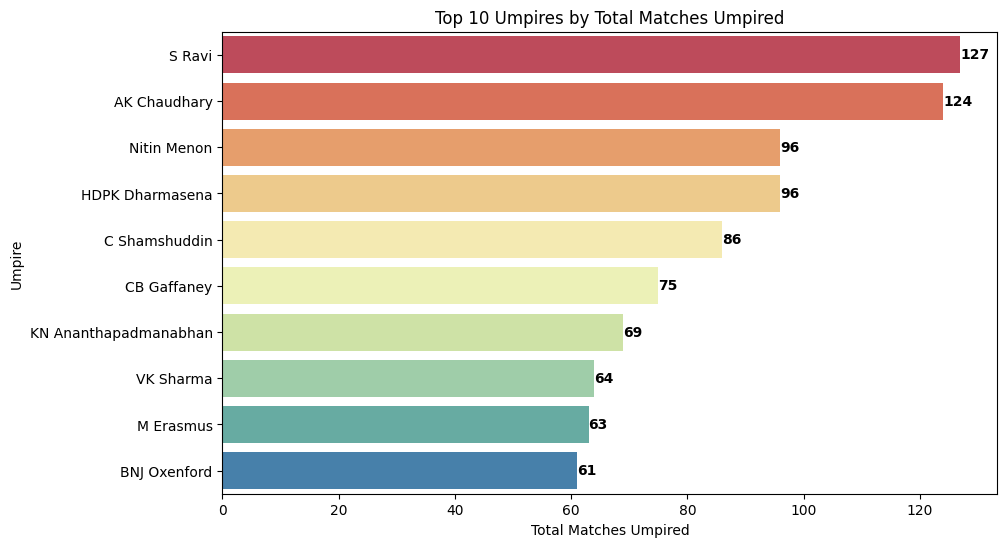


Top Umpires by Total Matches Umpired:


,Umpire,Matches
54,S Ravi,127
4,AK Chaudhary,124
43,Nitin Menon,96
24,HDPK Dharmasena,96
15,C Shamshuddin,86
16,CB Gaffaney,75
34,KN Ananthapadmanabhan,69
66,VK Sharma,64
35,M Erasmus,63
13,BNJ Oxenford,61


In [87]:
umpire1_counts = matches['umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['Umpire', 'Matches']

umpire2_counts = matches['umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['Umpire', 'Matches']

overall_umpires = pd.concat([umpire1_counts, umpire2_counts])
overall_umpires = overall_umpires.groupby('Umpire').sum().reset_index().sort_values(by='Matches', ascending=False)

plt.figure(figsize=(10, 6))
bar2 = sns.barplot(x='Matches', y='Umpire', data=overall_umpires.head(10), palette='Spectral')
plt.title('Top 10 Umpires by Total Matches Umpired')
plt.xlabel('Total Matches Umpired')
plt.ylabel('Umpire')
for p in bar2.patches:
    bar2.annotate(int(p.get_width()), (p.get_width(), p.get_y() + p.get_height()/2), 
                  ha='left', va='center', fontsize=10, weight='bold')
plt.show()


print("\nTop Umpires by Total Matches Umpired:")
overall_umpires.head(10)


### **Merging Both Datasets for Comprehensive Analysis**

In [88]:
merged_data = deliveries.merge(matches, on='match_id', how='left')

## **Venue-Wise Analysis**

### Top 10 Batters Across Different Venues

This visualization shows the distribution of runs scored by the top 10 batters across various IPL venues.  
The heatmap highlights which players dominate in specific stadiums.  
Darker shades indicate higher run totals, providing quick insights into player-venue combinations.


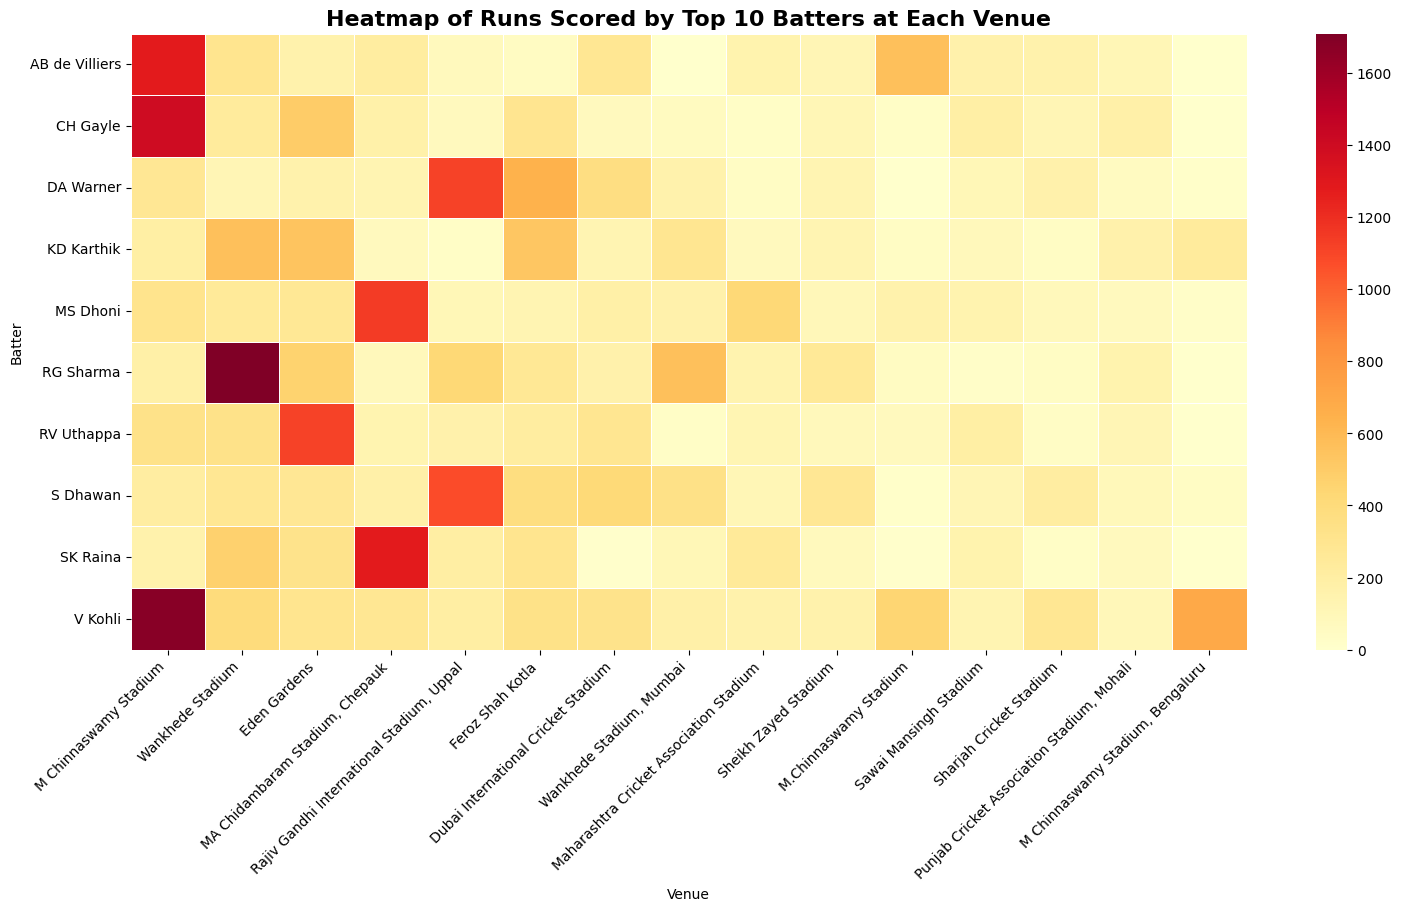

In [93]:

venue_performance = (
    merged_data.groupby(['venue', 'batter'])['batsman_runs']
    .sum()
    .reset_index()
    .sort_values(by='batsman_runs', ascending=False)
)


top_batters = (
    venue_performance.groupby('batter')['batsman_runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_batter_performance = venue_performance[venue_performance['batter'].isin(top_batters)]


batter_venue_heatmap = top_batter_performance.pivot_table(
    index='batter', columns='venue', values='batsman_runs', fill_value=0
)

top_venues = batter_venue_heatmap.sum(axis=0).sort_values(ascending=False).head(15).index
batter_venue_heatmap = batter_venue_heatmap[top_venues]

plt.figure(figsize=(18, 8))
sns.heatmap(batter_venue_heatmap, cmap='YlOrRd', linewidths=0.5, linecolor='white')
plt.title('Heatmap of Runs Scored by Top 10 Batters at Each Venue', fontsize=16, weight='bold')
plt.xlabel('Venue')
plt.ylabel('Batter')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



### Top 10 Bowlers Across Different Venues

This visualization shows the distribution of runs scored by the top 10 bowlers across various IPL venues.  
The heatmap highlights which players dominate in specific stadiums.  



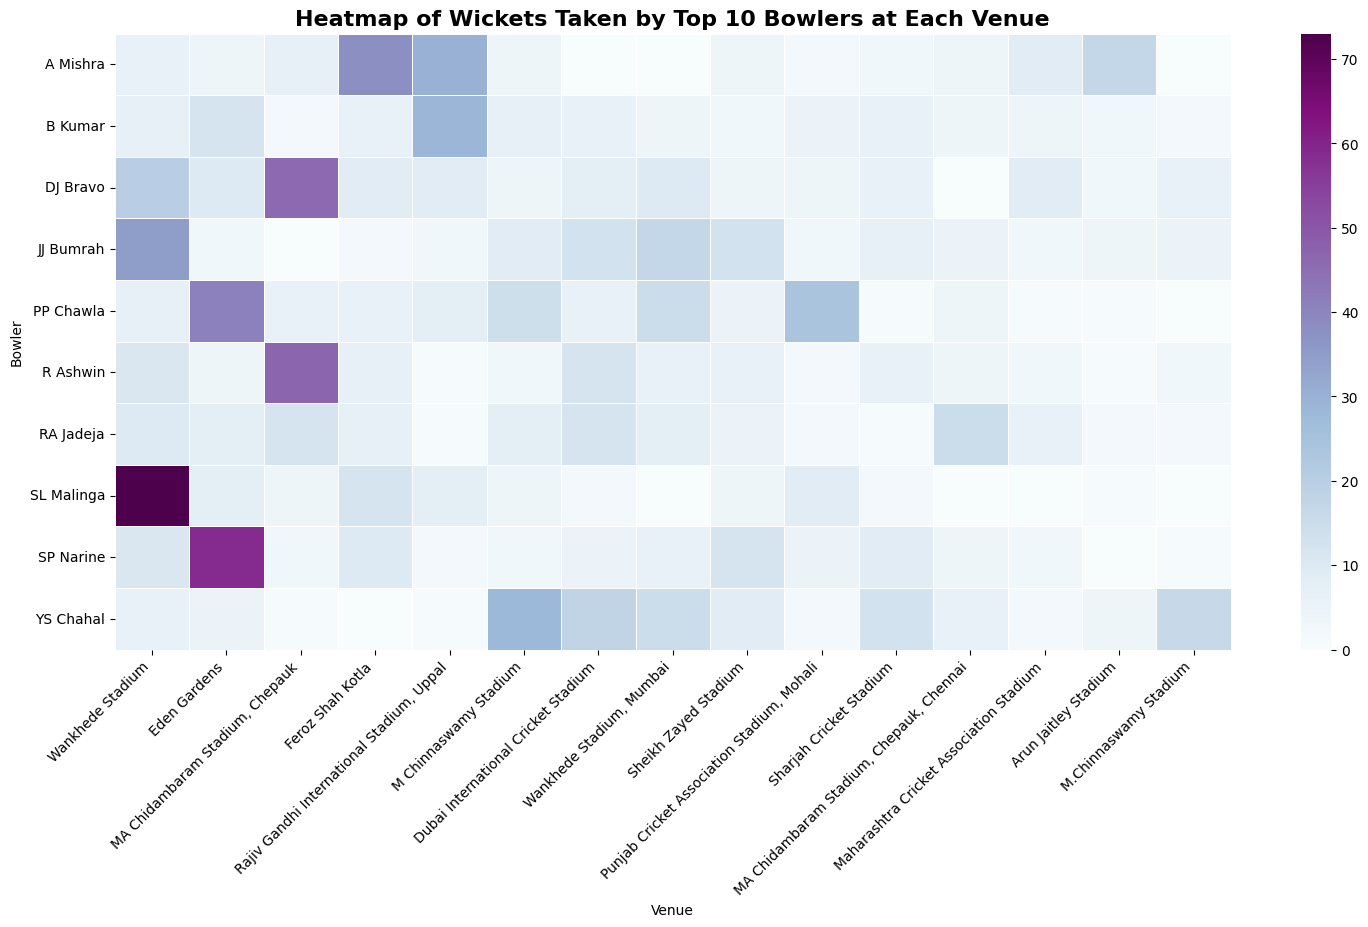

In [94]:
venue_wickets = (
    merged_data[merged_data['is_wicket'] == 1]
    .groupby(['venue', 'bowler'])
    .size()
    .reset_index(name='wickets')
    .sort_values(by='wickets', ascending=False)
)


top_bowlers = (
    venue_wickets.groupby('bowler')['wickets']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


top_bowler_wickets = venue_wickets[venue_wickets['bowler'].isin(top_bowlers)]

bowler_venue_heatmap = top_bowler_wickets.pivot_table(
    index='bowler', columns='venue', values='wickets', fill_value=0
)

top_venues_bowler = bowler_venue_heatmap.sum(axis=0).sort_values(ascending=False).head(15).index
bowler_venue_heatmap = bowler_venue_heatmap[top_venues_bowler]

plt.figure(figsize=(18, 8))
sns.heatmap(bowler_venue_heatmap, cmap='BuPu', linewidths=0.5, linecolor='white', annot=False)
plt.title('Heatmap of Wickets Taken by Top 10 Bowlers at Each Venue', fontsize=16, weight='bold')
plt.xlabel('Venue')
plt.ylabel('Bowler')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Team Performance Across Venues
In this analysis, we explore which teams have performed the best across different venues, based on total runs scored and wickets lost.


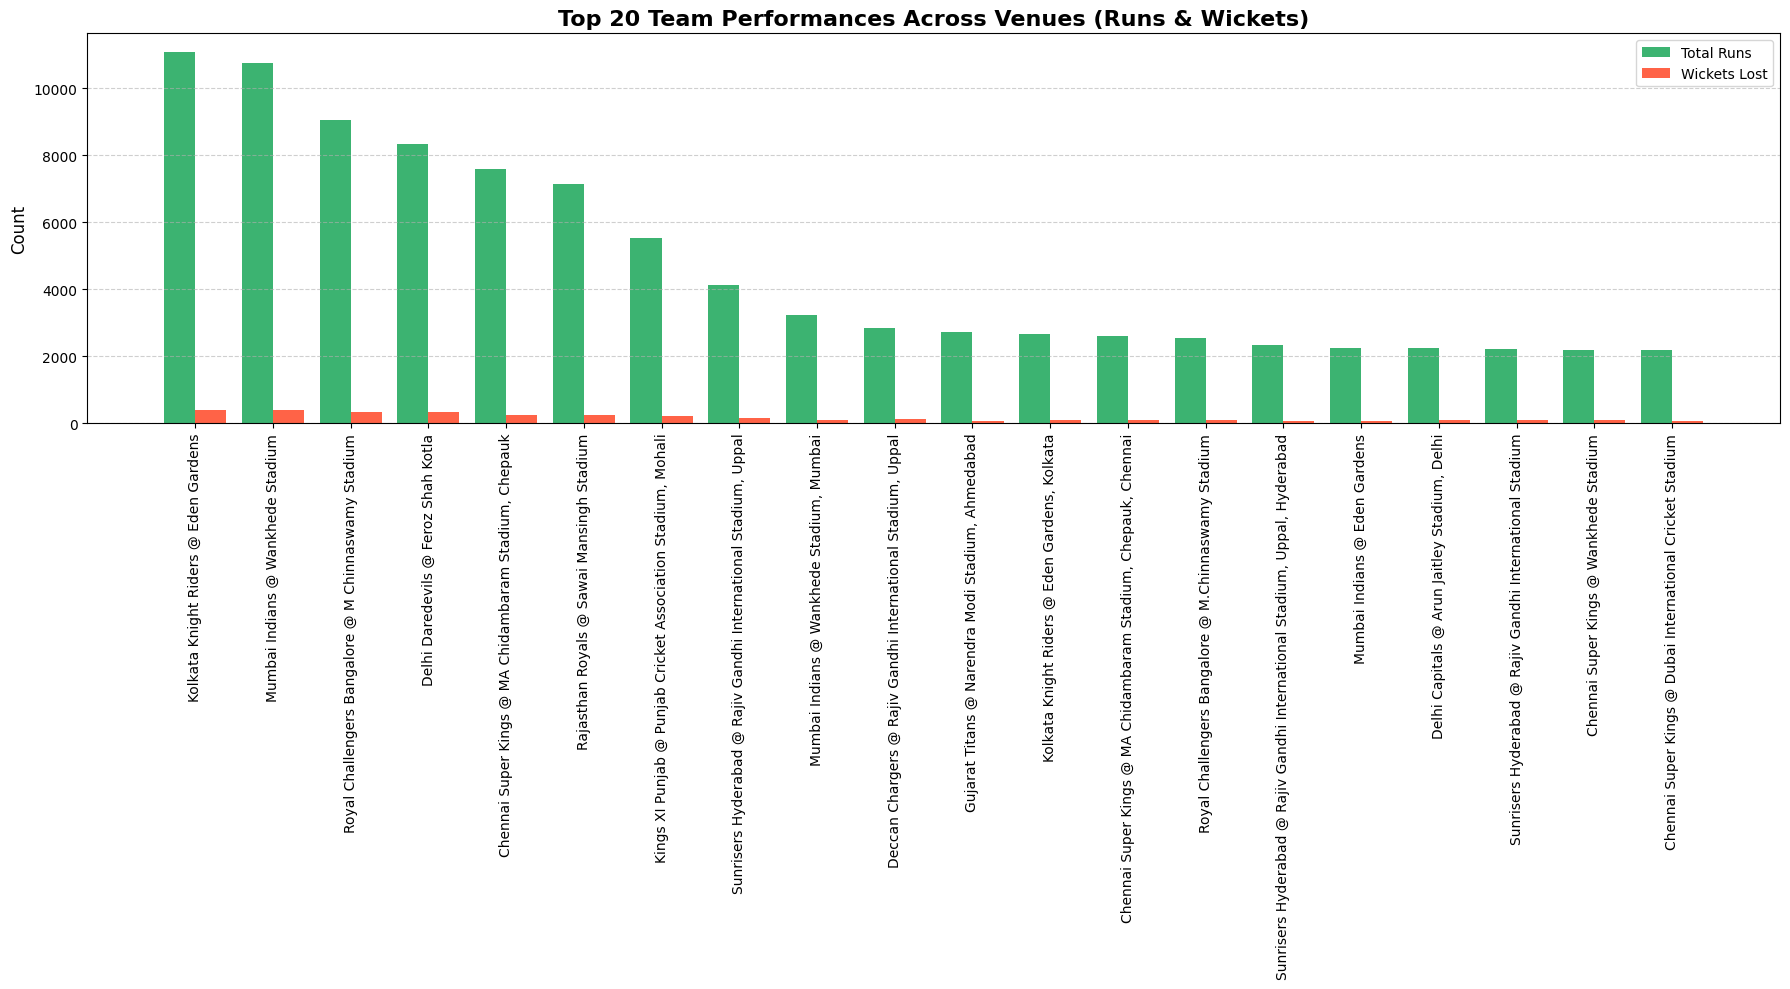

In [105]:
import numpy as np 
venue_team_performance = merged_data.groupby(['venue', 'batting_team']).agg({
    'total_runs': 'sum',
    'is_wicket': 'sum'
}).reset_index()

venue_team_performance_sorted = venue_team_performance.sort_values(by='total_runs', ascending=False).head(20)



teams_venues = venue_team_performance_sorted['batting_team'] + ' @ ' + venue_team_performance_sorted['venue']
x = np.arange(len(teams_venues)) 
bar_width = 0.4

plt.figure(figsize=(18, 10))


plt.bar(x - bar_width/2, venue_team_performance_sorted['total_runs'], 
        width=bar_width, color='mediumseagreen', label='Total Runs')


plt.bar(x + bar_width/2, venue_team_performance_sorted['is_wicket'], 
        width=bar_width, color='tomato', label='Wickets Lost')

plt.xticks(x, teams_venues, rotation=90, fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.title('Top 20 Team Performances Across Venues (Runs & Wickets)', fontsize=16, weight='bold')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()



## **Player of the Match Analysis**
This section analyzes the top players who have been awarded *Player of the Match* the most number of times throughout the IPL seasons.


Player with Most Player of the Match Awards: AB de Villiers with 24 awards

Top 10 Players with Player of the Match Awards:
           Player  Awards
0  AB de Villiers      24
1        CH Gayle      20
2       RG Sharma      19
3       DA Warner      17
4        MS Dhoni      17
5       RA Jadeja      16
6       SR Watson      16
7         V Kohli      15
8       SP Narine      15
9      AD Russell      15


C:\Users\shrut\AppData\Local\Temp\ipykernel_19608\676222462.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Awards', y='Player', data=player_of_match_counts.head(10), palette='crest')


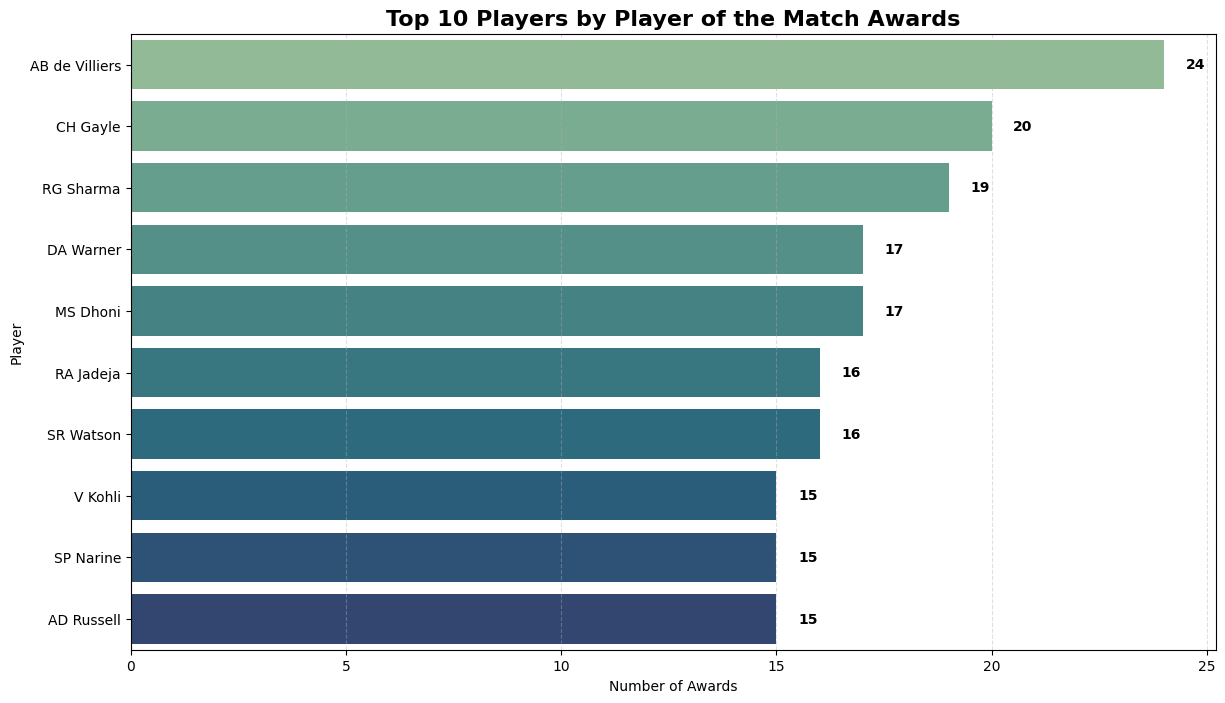

In [95]:


player_of_match_counts = matches['player_of_match'].value_counts().reset_index()
player_of_match_counts.columns = ['Player', 'Awards']

top_player = player_of_match_counts.iloc[0]
print(f"Player with Most Player of the Match Awards: {top_player['Player']} with {top_player['Awards']} awards")

print("\nTop 10 Players with Player of the Match Awards:")
print(player_of_match_counts.head(10))


plt.figure(figsize=(14, 8))
bar = sns.barplot(x='Awards', y='Player', data=player_of_match_counts.head(10), palette='crest')
plt.title('Top 10 Players by Player of the Match Awards', fontsize=16, weight='bold')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Annotate bars
for p in bar.patches:
    plt.text(p.get_width() + 0.5, p.get_y() + p.get_height()/2, int(p.get_width()), ha='left', va='center', fontsize=10, weight='bold')

plt.show()


## **Visualizing Player Performance Over Seasons**

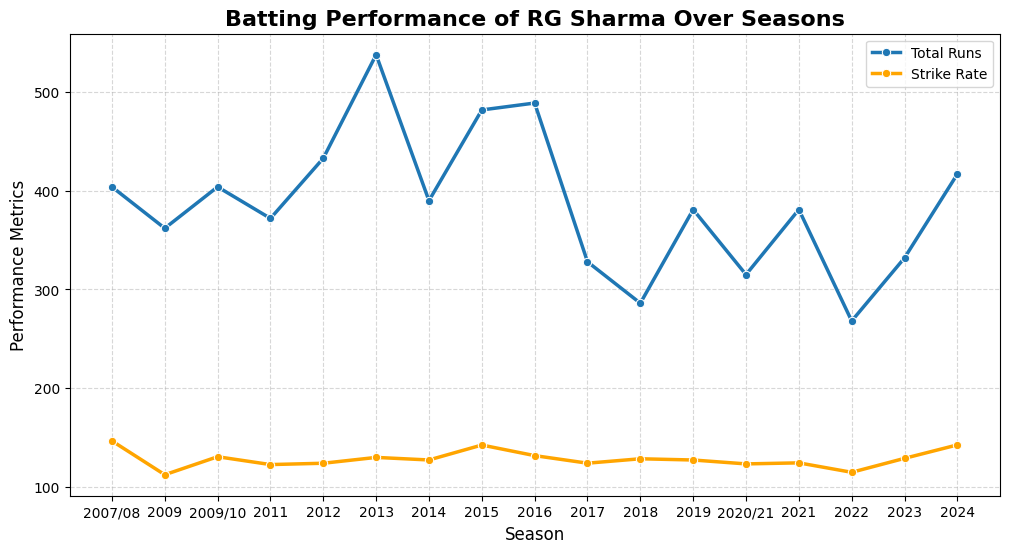

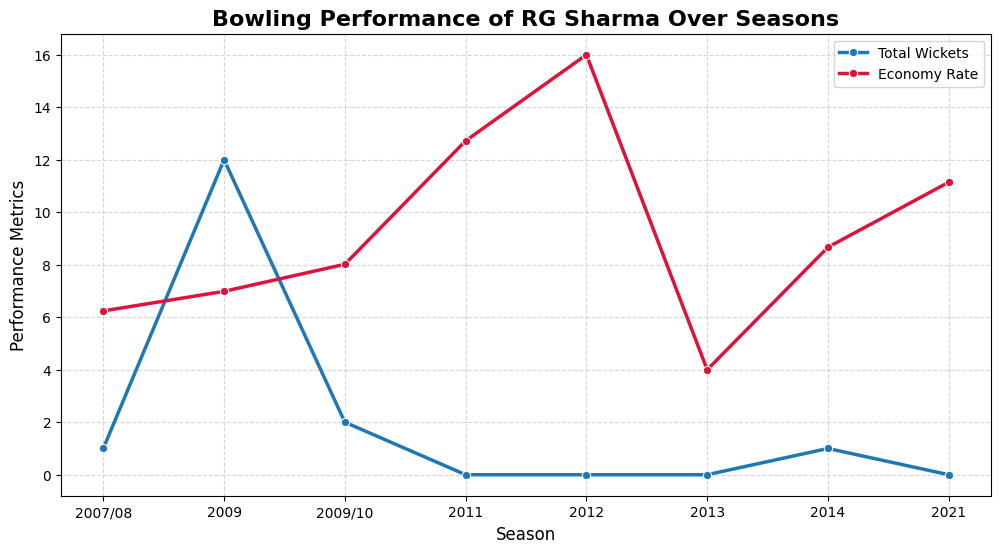

In [ ]:

def visualize_player_performance_over_seasons(player_name, deliveries_df, matches_df):

    merged_data = pd.merge(deliveries_df, matches_df[['match_id', 'season']], on='match_id')

    player_batting = merged_data[merged_data['batter'] == player_name]

    if not player_batting.empty:
        batting_stats = player_batting.groupby('season').agg(
            total_runs=('batsman_runs', 'sum'),
            balls_faced=('ball', 'count')
        ).reset_index()
        batting_stats['strike_rate'] = (batting_stats['total_runs'] / batting_stats['balls_faced']) * 100

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=batting_stats, x='season', y='total_runs', marker='o', linewidth=2.5, label='Total Runs')
        sns.lineplot(data=batting_stats, x='season', y='strike_rate', marker='o', linewidth=2.5, label='Strike Rate', color='orange')
        plt.title(f"Batting Performance of {player_name} Over Seasons", fontsize=16, weight='bold')
        plt.xlabel('Season', fontsize=12)
        plt.ylabel('Performance Metrics', fontsize=12)
        plt.grid(linestyle='--', alpha=0.5)
        plt.legend()
        plt.show()
    else:
        print(f"No batting data available for {player_name}.")


    player_bowling = merged_data[merged_data['bowler'] == player_name]

    if not player_bowling.empty:
        bowling_stats = player_bowling.groupby('season').agg(
            total_wickets=('is_wicket', 'sum'),
            runs_conceded=('total_runs', 'sum'),
            balls_bowled=('ball', 'count')
        ).reset_index()
        bowling_stats['economy_rate'] = bowling_stats['runs_conceded'] / (bowling_stats['balls_bowled'] / 6)

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=bowling_stats, x='season', y='total_wickets', marker='o', linewidth=2.5, label='Total Wickets')
        sns.lineplot(data=bowling_stats, x='season', y='economy_rate', marker='o', linewidth=2.5, label='Economy Rate', color='crimson')
        plt.title(f"Bowling Performance of {player_name} Over Seasons", fontsize=16, weight='bold')
        plt.xlabel('Season', fontsize=12)
        plt.ylabel('Performance Metrics', fontsize=12)
        plt.grid(linestyle='--', alpha=0.5)
        plt.legend()
        plt.show()
    else:
        print(f"No bowling data available for {player_name}.")


visualize_player_performance_over_seasons('RG Sharma', deliveries, matches)

